In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from Classification.cnn1D_model import train_and_evaluate
import random
import pandas as pd
from utils.baseline_xai import *
from  visualization.relevance_visualization import *
from utils.xai_implementation import *
from utils.receptieve_field import *
from Classification.unseen_test import *
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader, random_split,Subset

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [5]:
device

device(type='cuda')

data_directory = "../data/final/new_selection/normalized_windowed_downsampled_data_lessBAD"
train_loader, val_loader, test_loader,_ = stratified_data_loader(data_directory)

Train size: 4462, Val size: 1008, Test size: 913
Train good: 3871, Train bad: 591
Val good: 910, Val bad: 98
Test good: 825, Test bad: 88
Class ratio (good/bad) - Train: 6.55, Val: 9.29, Test: 9.38
Train operations: Counter({np.str_('OP06'): 722, np.str_('OP04'): 556, np.str_('OP02'): 506, np.str_('OP12'): 480, np.str_('OP10'): 416, np.str_('OP11'): 405, np.str_('OP08'): 386, np.str_('OP14'): 329, np.str_('OP01'): 284, np.str_('OP07'): 246, np.str_('OP05'): 132})
Val operations: Counter({np.str_('OP06'): 151, np.str_('OP04'): 149, np.str_('OP12'): 135, np.str_('OP02'): 120, np.str_('OP11'): 110, np.str_('OP10'): 104, np.str_('OP08'): 69, np.str_('OP14'): 55, np.str_('OP07'): 41, np.str_('OP01'): 41, np.str_('OP05'): 33})
Test operations: Counter({np.str_('OP10'): 159, np.str_('OP04'): 132, np.str_('OP02'): 106, np.str_('OP06'): 85, np.str_('OP01'): 82, np.str_('OP11'): 80, np.str_('OP12'): 72, np.str_('OP08'): 59, np.str_('OP07'): 52, np.str_('OP14'): 49, np.str_('OP05'): 37})


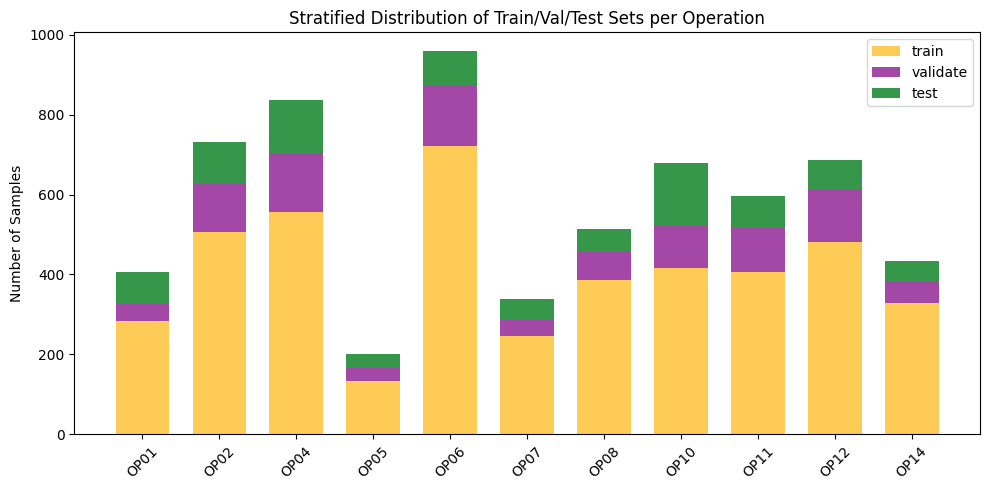


Unique file groups in Train: 579
Unique file groups in Val: 125
Unique file groups in Test: 124

File group overlap between Train and Val: 0
File group overlap between Train and Test: 0
File group overlap between Val and Test: 0


In [84]:
# this code insures that the sample splitted into 5 second will not be present in train/test/val groups, as it prevents data leakage from a same sample
data_directory = "../data/final/new_selection/less_bad/normalized_windowed_downsampled_data_lessBAD"
train_loader, val_loader, test_loader,_ = stratified_group_split(data_directory, idx_return=False)


Using device: cuda
Epoch [1/30] - Train Loss: 0.6768, Train Acc: 0.8527 - Val Loss: 0.2628, Val Acc: 0.9291 
Epoch [2/30] - Train Loss: 0.1124, Train Acc: 0.9634 - Val Loss: 0.0398, Val Acc: 0.9929 
Epoch [3/30] - Train Loss: 0.0474, Train Acc: 0.9854 - Val Loss: 0.1468, Val Acc: 0.9403 
Epoch [4/30] - Train Loss: 0.0353, Train Acc: 0.9888 - Val Loss: 0.0568, Val Acc: 0.9818 
Epoch [5/30] - Train Loss: 0.0220, Train Acc: 0.9919 - Val Loss: 0.0172, Val Acc: 0.9949 
Epoch [6/30] - Train Loss: 0.0268, Train Acc: 0.9926 - Val Loss: 0.0135, Val Acc: 0.9970 
Epoch [7/30] - Train Loss: 0.0174, Train Acc: 0.9946 - Val Loss: 0.0125, Val Acc: 0.9970 
Epoch [8/30] - Train Loss: 0.0133, Train Acc: 0.9962 - Val Loss: 0.0117, Val Acc: 0.9970 
Epoch [9/30] - Train Loss: 0.0112, Train Acc: 0.9964 - Val Loss: 0.0347, Val Acc: 0.9909 
Epoch [10/30] - Train Loss: 0.0119, Train Acc: 0.9969 - Val Loss: 0.0200, Val Acc: 0.9939 
Epoch [11/30] - Train Loss: 0.0069, Train Acc: 0.9982 - Val Loss: 0.0161, Val Ac

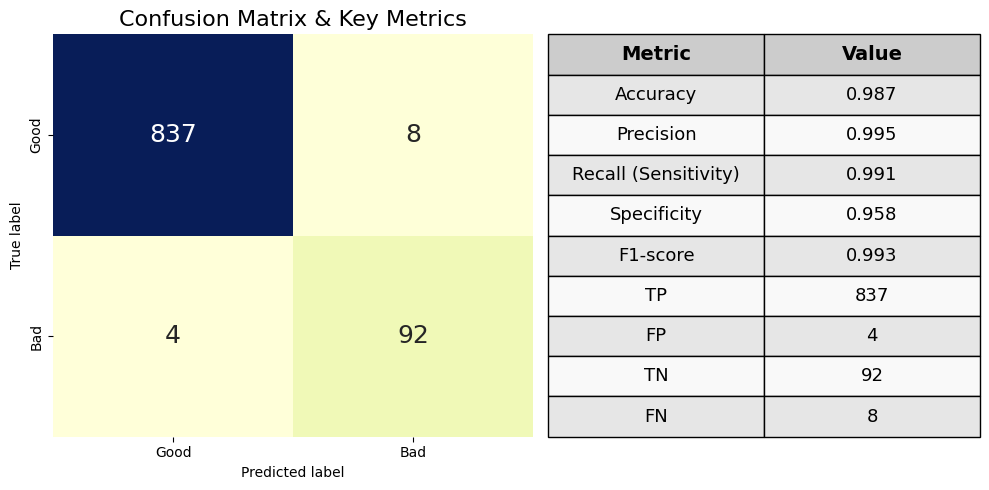

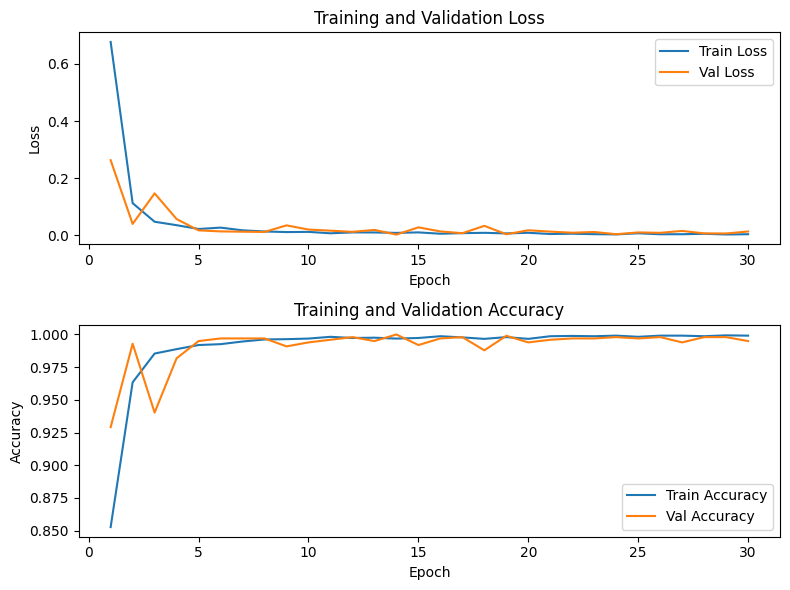

In [13]:
#CNN1d_wide
best_model = train_and_evaluate(train_loader, val_loader, test_loader, model_class=CNN1D_Wide, Schedule=True)

In [14]:
# Save the trained model
torch.save(best_model.state_dict(), "../cnn1d_model_wide_new_2.ckpt")
print("✅ Model saved to cnn1d_model_ds_wide_new.ckpt")
best_model.to(device)
best_model.eval()  # Switch to evaluation mode
print("✅ Model loaded and ready for explanations")
print(f"✅ Model is structured as  \n {best_model}")


✅ Model saved to cnn1d_model_ds_wide_new.ckpt
✅ Model loaded and ready for explanations
✅ Model is structured as  
 CNN1D_Wide(
  (conv1): Conv1d(3, 16, kernel_size=(25,), stride=(1,), padding=(12,))
  (pool1): MaxPool1d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  (dropout1): Dropout(p=0.2, inplace=False)
  (conv2): Conv1d(16, 32, kernel_size=(15,), stride=(1,), padding=(7,))
  (pool2): MaxPool1d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  (dropout2): Dropout(p=0.2, inplace=False)
  (conv3): Conv1d(32, 64, kernel_size=(9,), stride=(1,), padding=(4,))
  (pool3): MaxPool1d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  (dropout3): Dropout(p=0.2, inplace=False)
  (conv4): Conv1d(64, 128, kernel_size=(5,), stride=(1,), padding=(2,))
  (pool4): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout4): Dropout(p=0.2, inplace=False)
  (global_avg_pool): AdaptiveAvgPool1d(output_size=1)
  (fc1): Li

Using device: cuda
Epoch [1/30] - Train Loss: 0.3831, Train Acc: 0.8819 - Val Loss: 0.4301, Val Acc: 0.8564 
Epoch [2/30] - Train Loss: 0.1704, Train Acc: 0.9289 - Val Loss: 0.1358, Val Acc: 0.9434 
Epoch [3/30] - Train Loss: 0.0448, Train Acc: 0.9904 - Val Loss: 0.0110, Val Acc: 0.9990 
Epoch [4/30] - Train Loss: 0.0377, Train Acc: 0.9886 - Val Loss: 0.0128, Val Acc: 0.9990 
Epoch [5/30] - Train Loss: 0.0160, Train Acc: 0.9964 - Val Loss: 0.0042, Val Acc: 0.9990 
Epoch [6/30] - Train Loss: 0.0157, Train Acc: 0.9964 - Val Loss: 0.0083, Val Acc: 0.9958 
Epoch [7/30] - Train Loss: 0.0200, Train Acc: 0.9931 - Val Loss: 0.0022, Val Acc: 1.0000 
Epoch [8/30] - Train Loss: 0.0070, Train Acc: 0.9978 - Val Loss: 0.0047, Val Acc: 0.9990 
Epoch [9/30] - Train Loss: 0.0061, Train Acc: 0.9982 - Val Loss: 0.0011, Val Acc: 1.0000 
Epoch [10/30] - Train Loss: 0.0034, Train Acc: 0.9991 - Val Loss: 0.0013, Val Acc: 1.0000 
Epoch [11/30] - Train Loss: 0.0074, Train Acc: 0.9971 - Val Loss: 0.1711, Val Ac

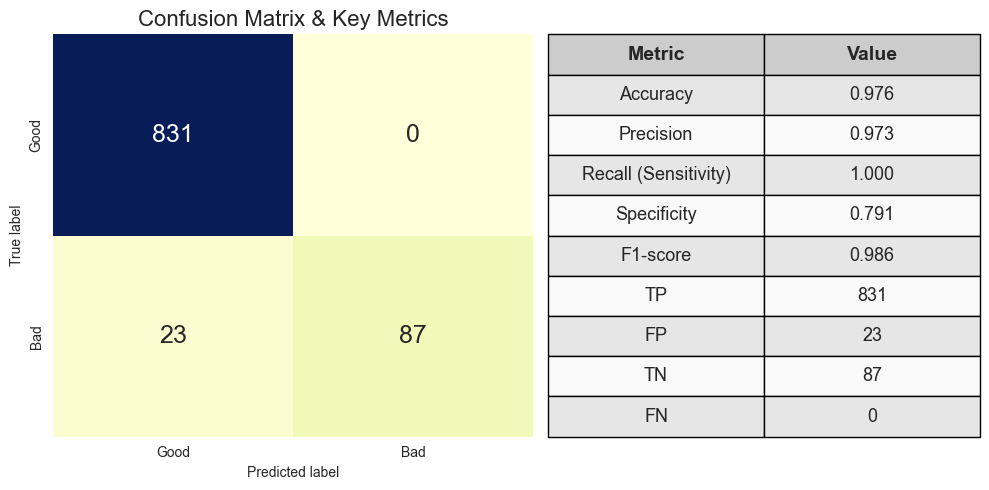

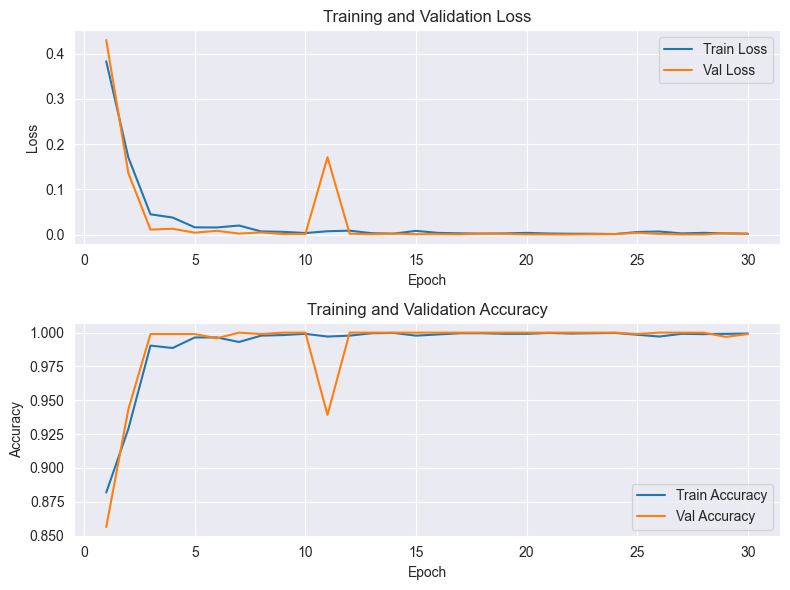

In [8]:
#CNN1d_ds_wide
best_model_ds_wide = train_and_evaluate(train_loader, val_loader, test_loader, model_class=CNN1D_DS_Wide, Schedule=False)


In [10]:
# Save the trained model
torch.save(best_model_ds_wide.state_dict(), "../cnn1d_model_ds_wide_new.ckpt")
print("✅ Model saved to cnn1d_model_ds_wide_new.ckpt")
best_model_ds_wide.to(device)
best_model_ds_wide.eval()  # Switch to evaluation mode
print("✅ Model loaded and ready for explanations")
print(f"✅ Model is structured as  \n {best_model_ds_wide}")


✅ Model saved to cnn1d_model_ds_wide_new.ckpt
✅ Model loaded and ready for explanations
✅ Model is structured as  
 CNN1D_DS_Wide(
  (conv1): Conv1d(3, 16, kernel_size=(25,), stride=(1,), padding=(12,))
  (gn1): GroupNorm(4, 16, eps=1e-05, affine=True)
  (pool1): MaxPool1d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv1d(16, 32, kernel_size=(15,), stride=(1,), padding=(7,))
  (gn2): GroupNorm(4, 32, eps=1e-05, affine=True)
  (pool2): MaxPool1d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv1d(32, 64, kernel_size=(9,), stride=(1,), padding=(4,))
  (gn3): GroupNorm(4, 64, eps=1e-05, affine=True)
  (pool3): MaxPool1d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (global_avg_pool): AdaptiveAvgPool1d(output_size=1)
  (fc1): Linear(in_features=64, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=2, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (relu): ReLU()
)


Loaded 9112 files from unseen data
Evaluating CNN1D_Wide...


E:\Thesis\Datasets\CNC\Classification\unseen_test.py:301: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  
E:\Thesis\Datasets\CNC\Classification\unseen_test.py:306: FutureWarn


Evaluating CNN1D_DS_Wide...


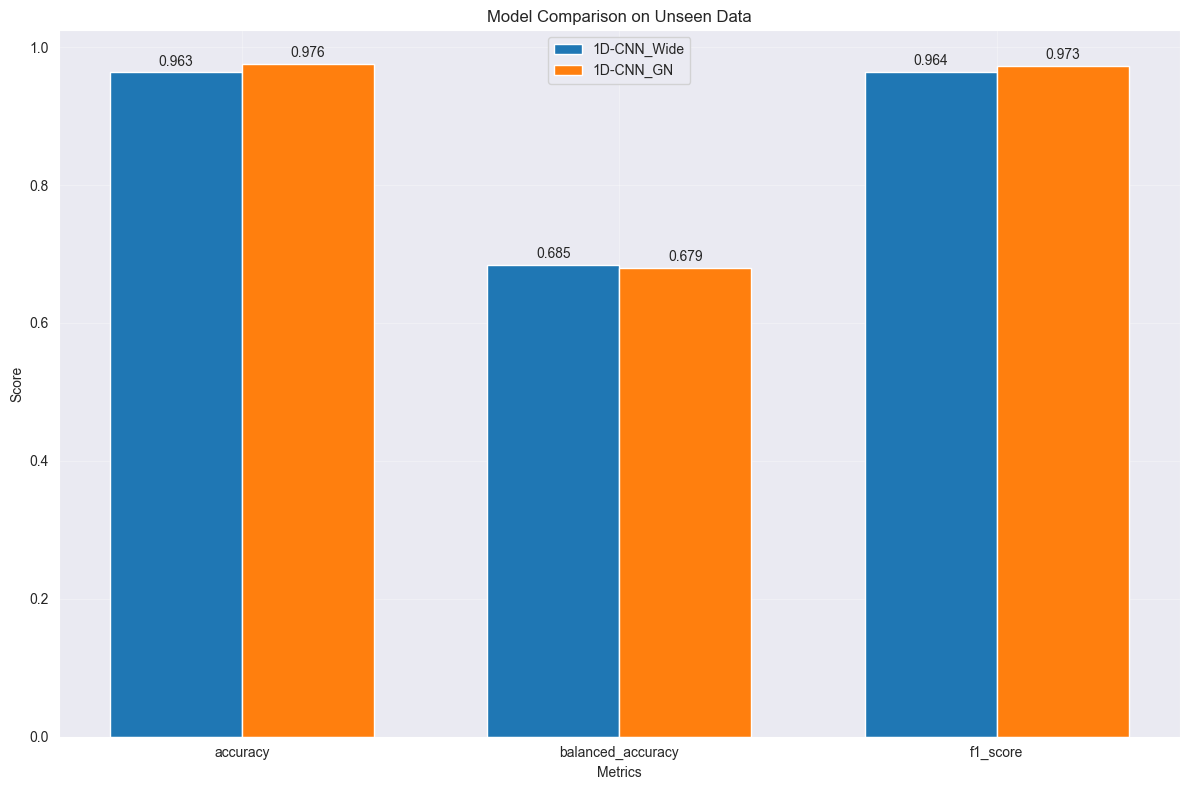

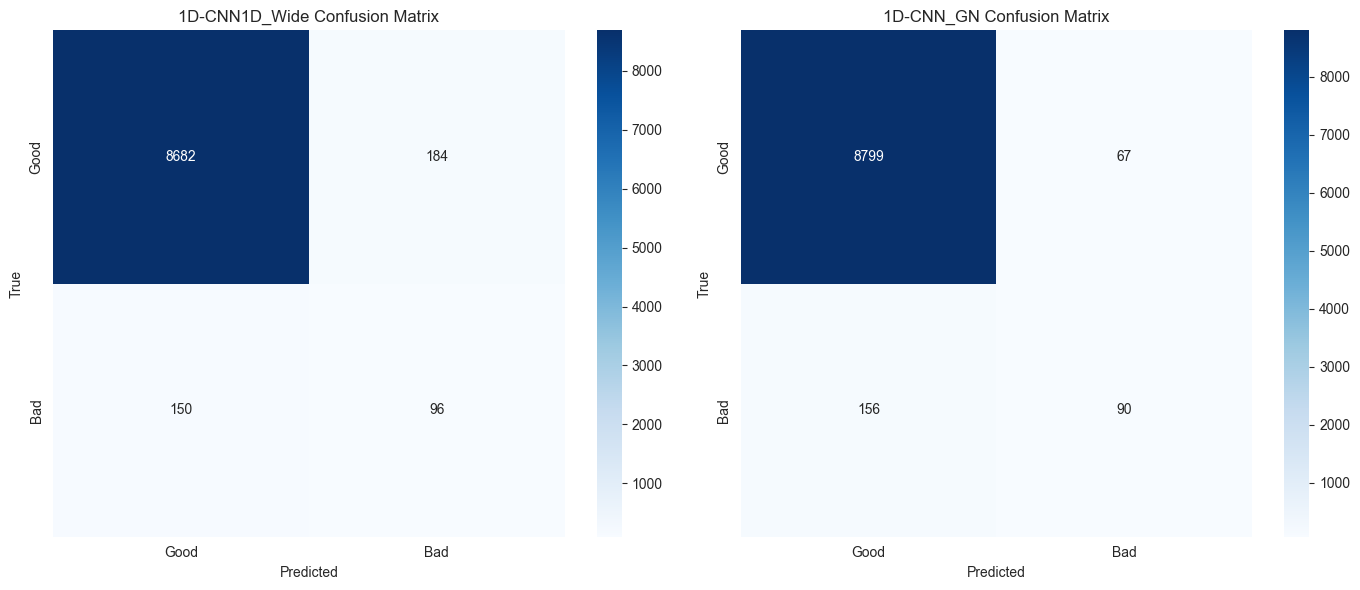

In [17]:
unseen_data_path = "../data/final/unseen_data/normalized_windowed_downsampled_unseen"
model1_path = "../cnn1d_model_wide_new.ckpt"
model2_path = "../cnn1d_model_ds_wide_new.ckpt"
result1, result2 = compare_models_on_unseen_data(unseen_data_path, model1_path, model2_path)

Loaded 9112 files from unseen data


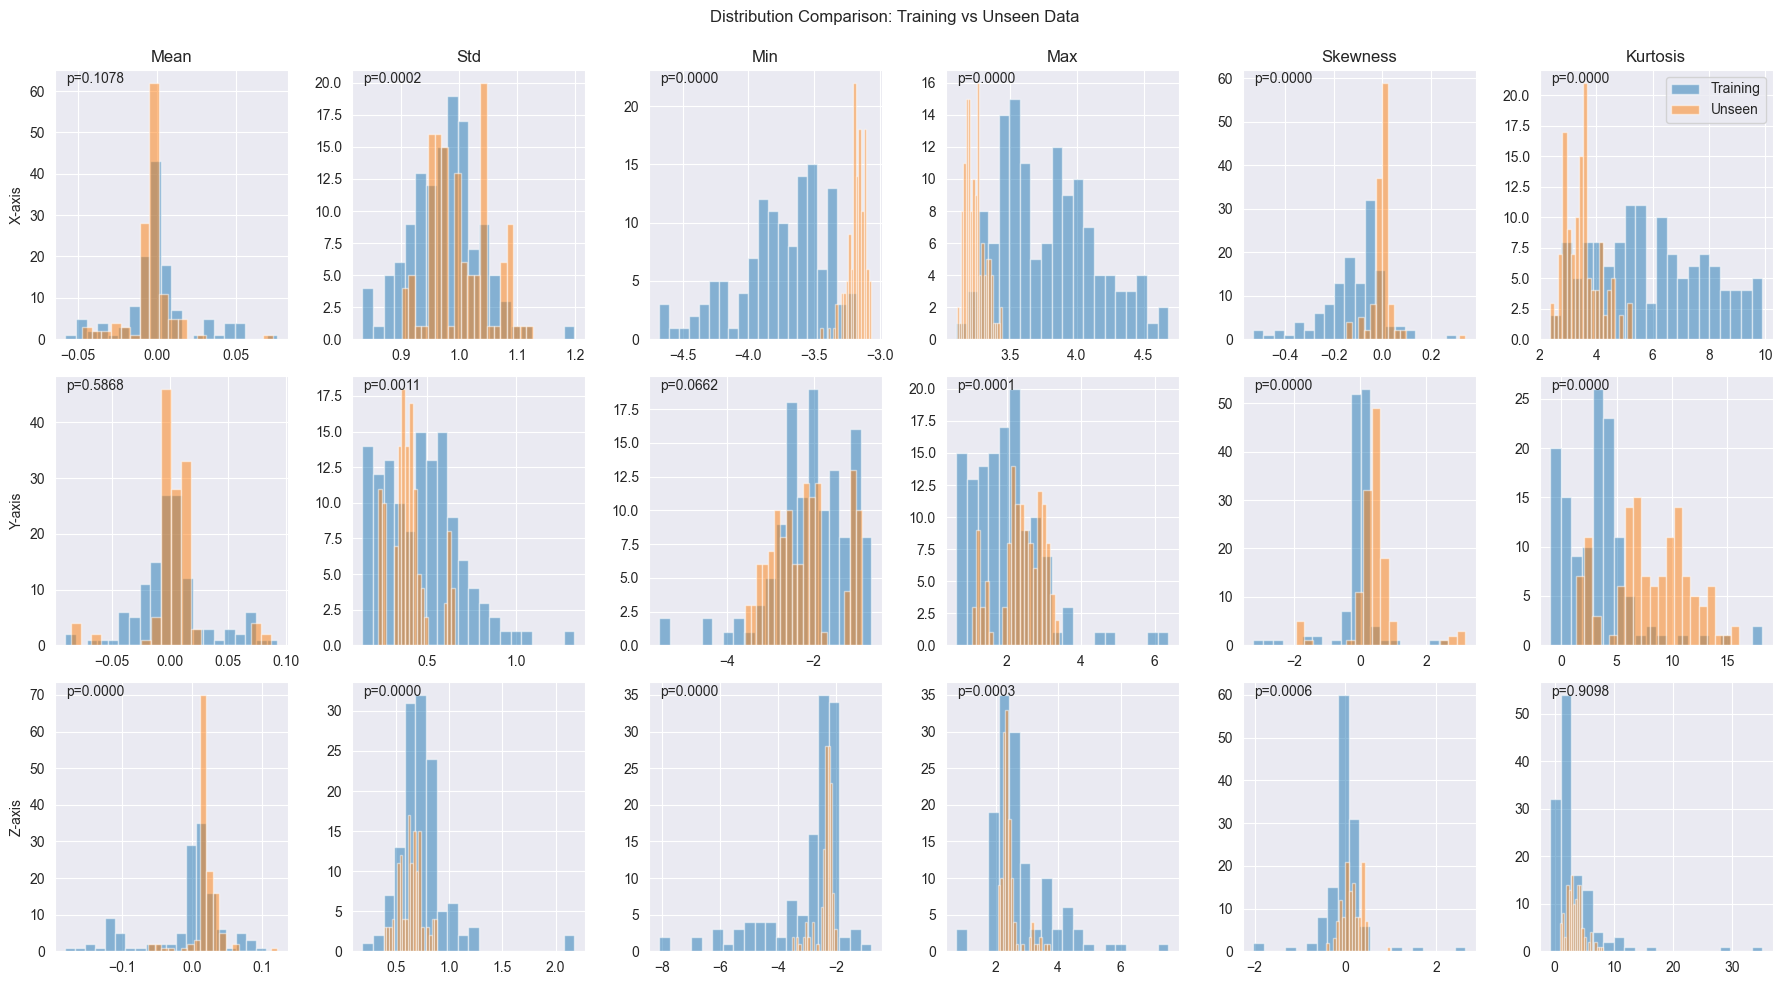

In [22]:
unseen_dataset = UnseenVibrationDataset(unseen_data_path)
unseen_loader = DataLoader(unseen_dataset, batch_size=128, shuffle=False)
analyze_data_distribution(train_loader,unseen_loader)

In [25]:
sample_batch, label_batch = next(iter(train_loader))
random.seed(34)
# Choose a random index
random_index = random.randint(0, len(sample_batch) - 1)
# Select the random sample and its corresponding label
sample = sample_batch[random_index]  # Shape: (3, 10000)
signal = sample.detach().cpu().numpy()


Receptive Field Calculations for CNN1D_Wide:
--------------------------------------------------------------------------------
Layer        Kernel   Stride   RF       Jump     Out Size
--------------------------------------------------------------------------------
Input        -        -        1        1        2000    
Conv1D-1     25       1        25       1        1977    
MaxPool1D-1  4        4        28       4        494     
Conv1D-2     15       1        84       4        481     
MaxPool1D-2  4        4        96       16       120     
Conv1D-3     9        1        224      16       113     
MaxPool1D-3  4        4        272      64       28      
Conv1D-4     5        1        528      64       25      
MaxPool1D-4  2        2        592      128      13      


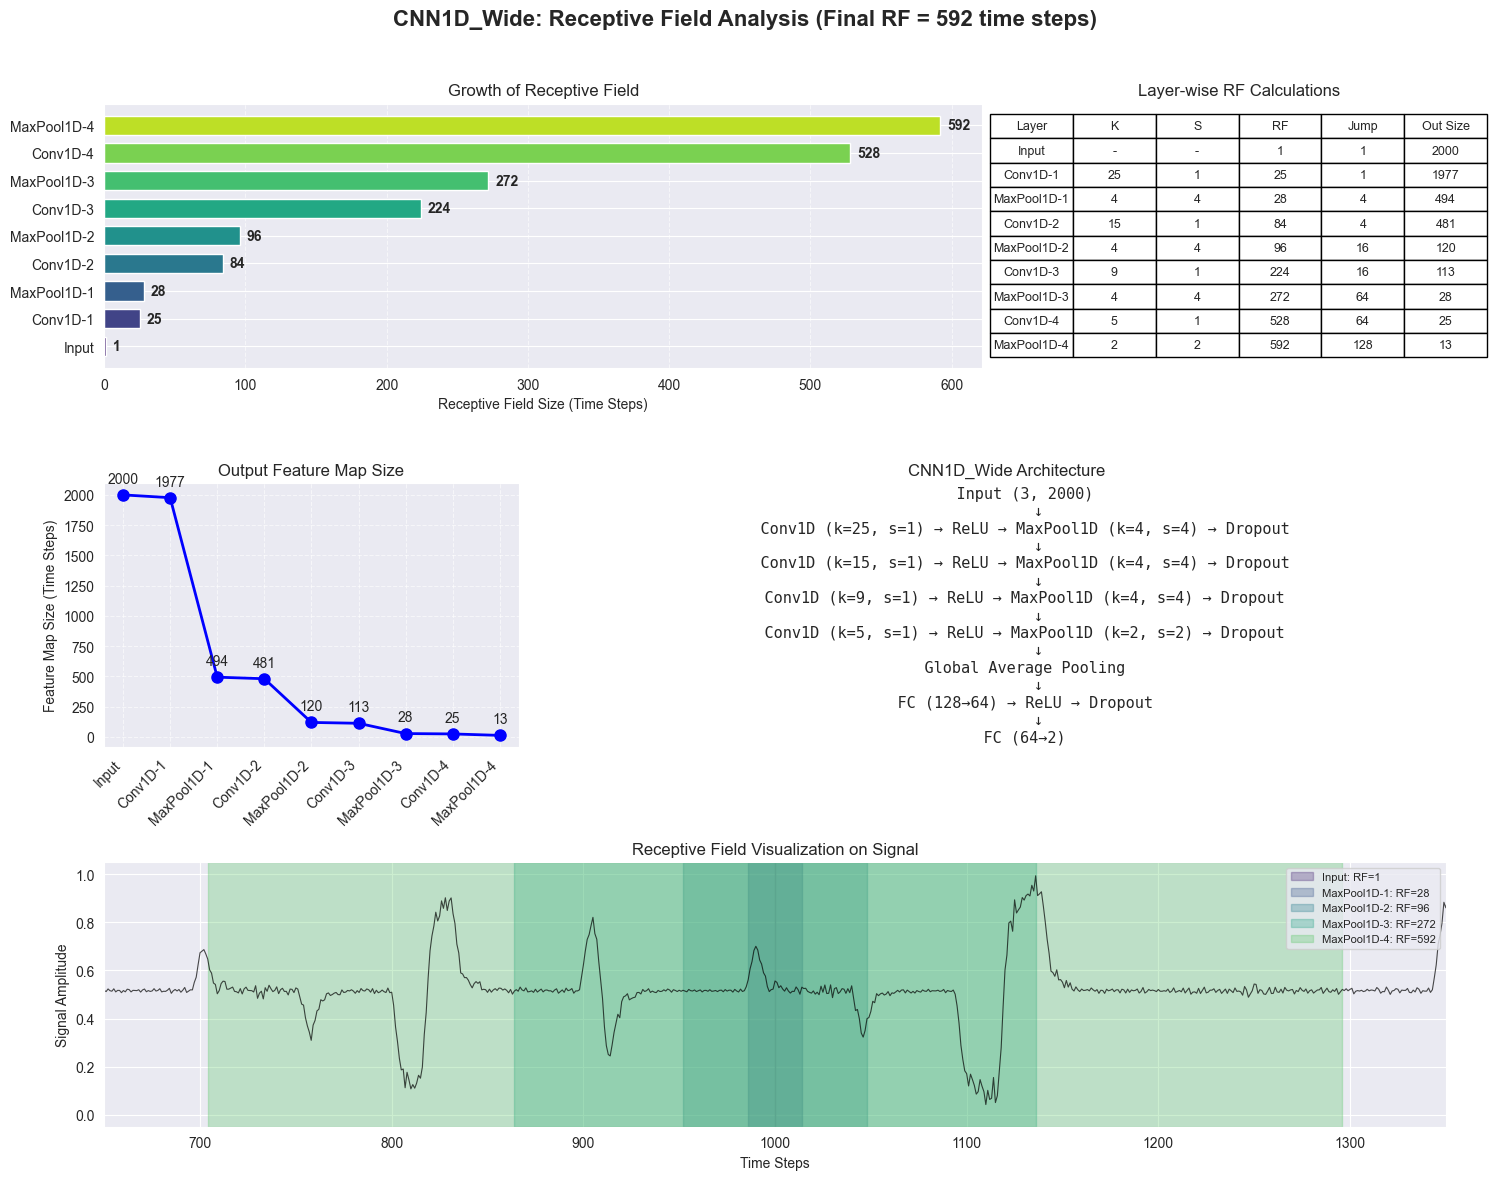

In [26]:
# receptieve field only for one axis, here the cnn1d_wide
# Call the function to calculate and visualize RF
fig, rf_table = plot_receptive_field_cnn1d_wide("cnn1d_wide_receptive_field.png",  actual_signal= signal[0])
# Print the receptive field table
print("\nReceptive Field Calculations for CNN1D_Wide:")
print("-" * 80)
print(f"{'Layer':<12} {'Kernel':<8} {'Stride':<8} {'RF':<8} {'Jump':<8} {'Out Size':<8}")
print("-" * 80)
for item in rf_table:
    print(f"{item['Layer']:<12} {str(item['Kernel Size']):<8} {str(item['Stride']):<8} {item['Receptive Field']:<8} {item['Jump']:<8} {item['Output Size']:<8}")


Receptive Field Calculations for CNN1D_DS_Wide:
--------------------------------------------------------------------------------
Layer        Kernel   Stride   RF       Jump     Out Size
--------------------------------------------------------------------------------
Input        -        -        1        1        2000    
Conv1D-1     25       1        25       1        1977    
MaxPool1D-1  3        2        27       2        988     
Conv1D-2     15       1        55       2        975     
MaxPool1D-2  3        2        59       4        487     
Conv1D-3     9        1        91       4        480     
MaxPool1D-3  3        2        99       8        240     


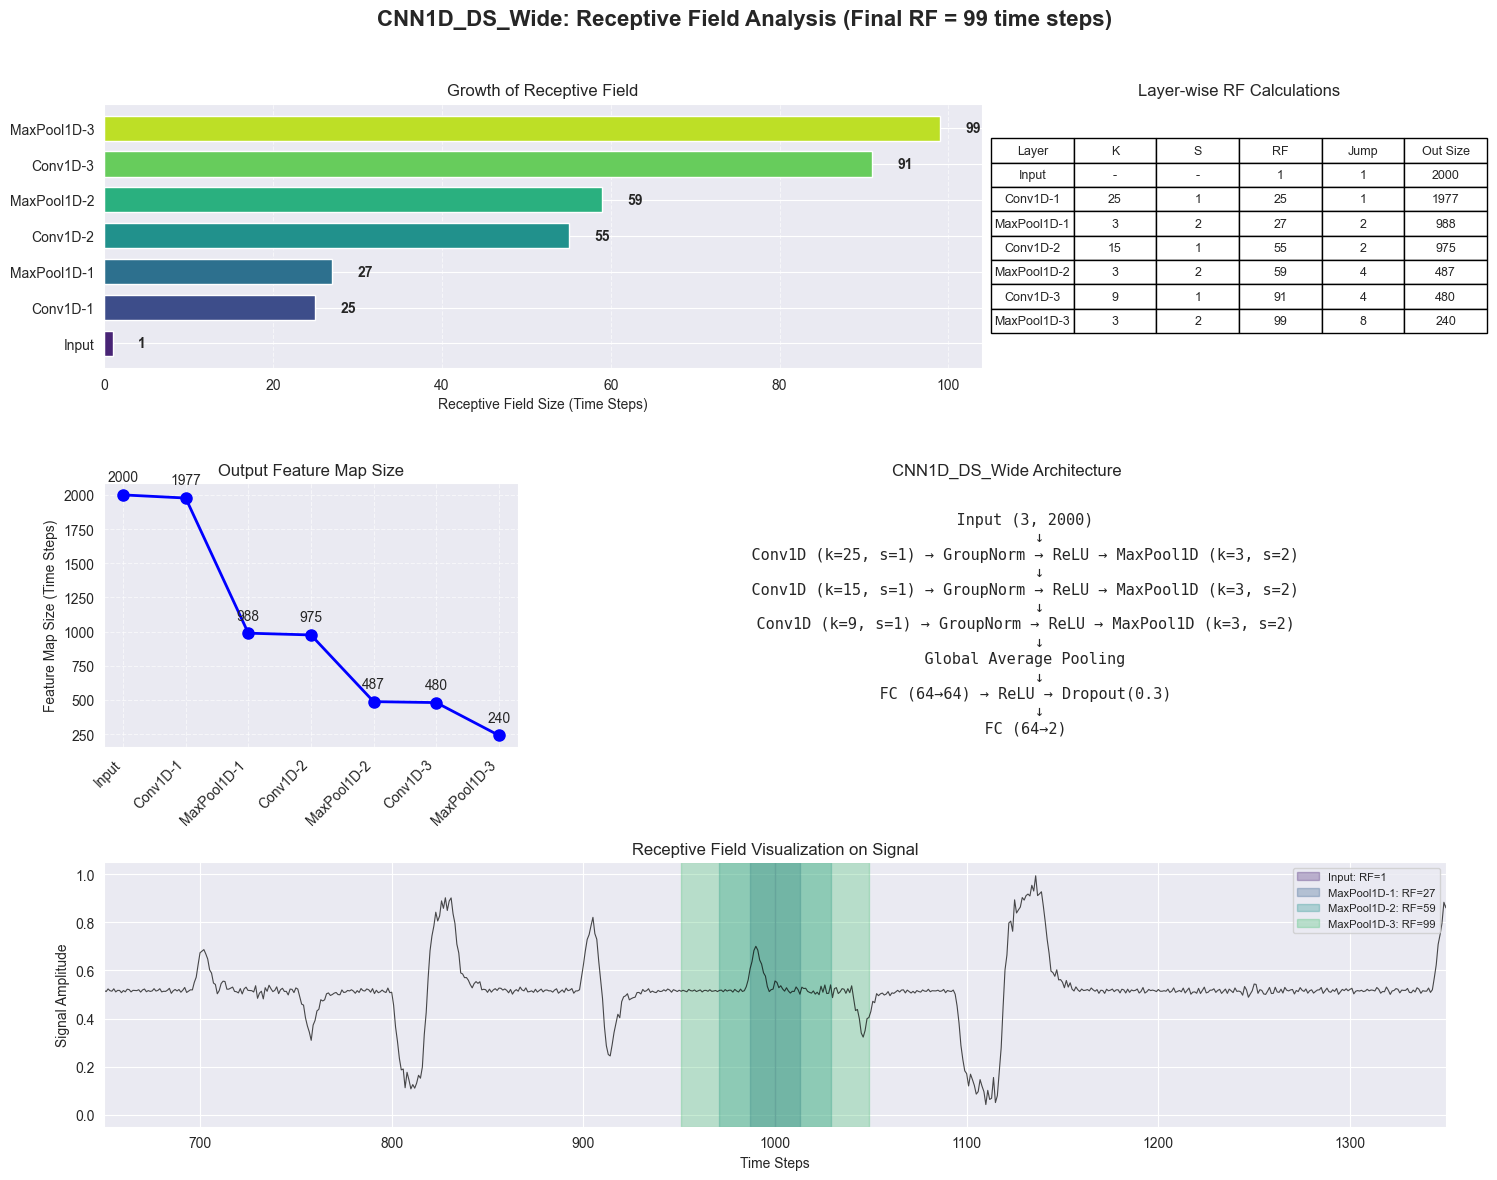

In [27]:
# receptieve field only for one axis, here the cnn1d_ds_wide
# Example usage with synthetic signal
fig, rf_table = plot_receptive_field_cnn1d_ds_wide("cnn1d_ds_wide_receptive_field.png", actual_signal= signal[0])

# Print the receptive field table
print("\nReceptive Field Calculations for CNN1D_DS_Wide:")
print("-" * 80)
print(f"{'Layer':<12} {'Kernel':<8} {'Stride':<8} {'RF':<8} {'Jump':<8} {'Out Size':<8}")
print("-" * 80)
for item in rf_table:
    print(f"{item['Layer']:<12} {str(item['Kernel Size']):<8} {str(item['Stride']):<8} {item['Receptive Field']:<8} {item['Jump']:<8} {item['Output Size']:<8}")



Receptive Field Calculations for CNN1D_Wide:
--------------------------------------------------------------------------------
Layer        Kernel   Stride   RF(Steps) RF(Sec) Jump     Out Size
--------------------------------------------------------------------------------
Input        -        -        1        0.0025   1        2000    
Conv1D-1     25       1        25       0.0625   1        1977    
MaxPool1D-1  4        4        28       0.07     4        494     
Conv1D-2     15       1        84       0.21     4        481     
MaxPool1D-2  4        4        96       0.24     16       120     
Conv1D-3     9        1        224      0.56     16       113     
MaxPool1D-3  4        4        272      0.68     64       28      
Conv1D-4     5        1        528      1.32     64       25      
MaxPool1D-4  2        2        592      1.48     128      13      


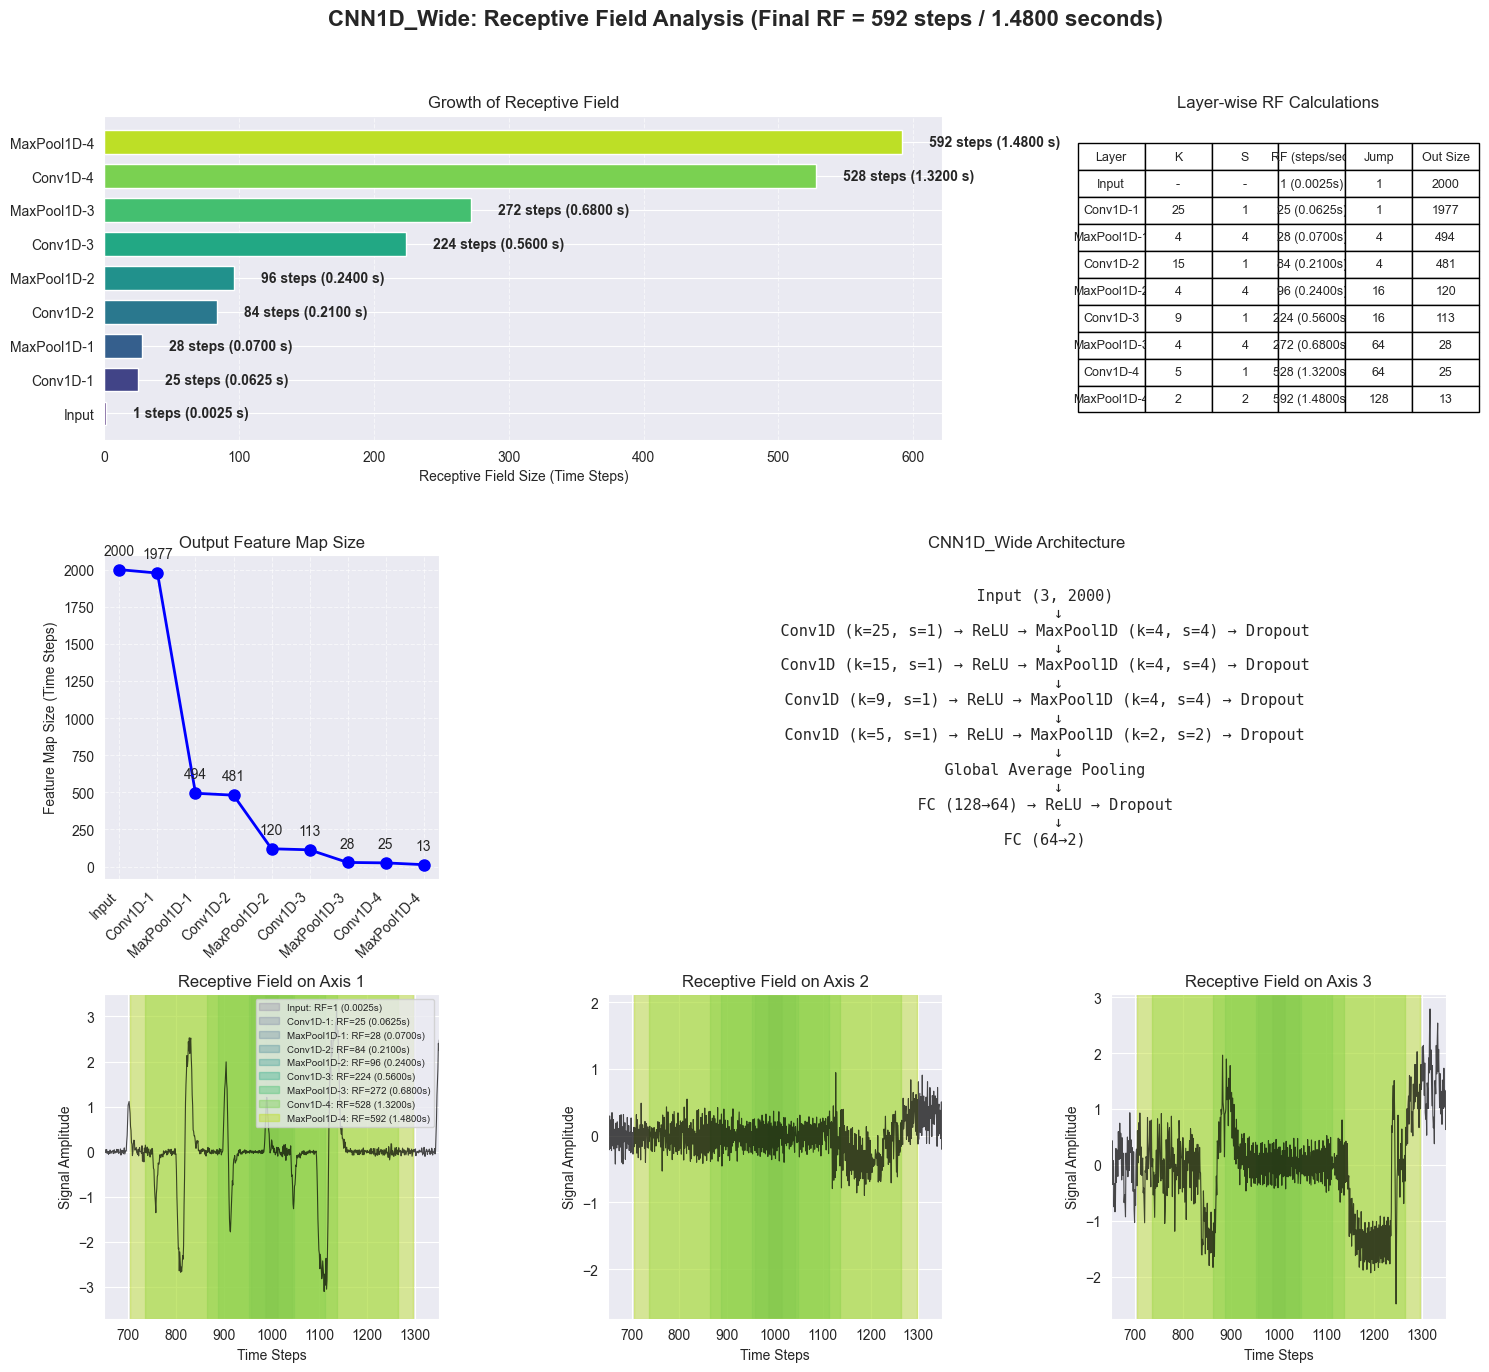

In [28]:
# Call the function to calculate and visualize RF
fig, rf_table = plot_receptive_field_cnn1d_wide_multiaxis(signal)

# Print the receptive field table
print("\nReceptive Field Calculations for CNN1D_Wide:")
print("-" * 80)
print(f"{'Layer':<12} {'Kernel':<8} {'Stride':<8} {'RF(Steps)':<8} {'RF(Sec)':<8}{'Jump':<8} {'Out Size':<8}")
print("-" * 80)
for item in rf_table:
    print(f"{item['Layer']:<12} {str(item['Kernel Size']):<8} {str(item['Stride']):<8} {item['RF (steps)']:<8} {item['RF (sec)']:<8} {item['Jump']:<8} {item['Out Size']:<8}")

### Not normalized data

Train size: 4448, Val size: 1002, Test size: 933
Train good: 3900, Train bad: 548
Val good: 869, Val bad: 133
Test good: 837, Test bad: 96
Class ratio (good/bad) - Train: 7.12, Val: 6.53, Test: 8.72
Train operations: Counter({np.str_('OP06'): 674, np.str_('OP02'): 512, np.str_('OP12'): 511, np.str_('OP04'): 499, np.str_('OP10'): 457, np.str_('OP08'): 426, np.str_('OP11'): 405, np.str_('OP14'): 328, np.str_('OP01'): 282, np.str_('OP07'): 230, np.str_('OP05'): 124})
Val operations: Counter({np.str_('OP04'): 191, np.str_('OP06'): 167, np.str_('OP11'): 120, np.str_('OP02'): 100, np.str_('OP10'): 95, np.str_('OP01'): 75, np.str_('OP12'): 72, np.str_('OP07'): 58, np.str_('OP14'): 56, np.str_('OP08'): 36, np.str_('OP05'): 32})
Test operations: Counter({np.str_('OP04'): 147, np.str_('OP10'): 127, np.str_('OP02'): 120, np.str_('OP06'): 117, np.str_('OP12'): 104, np.str_('OP11'): 70, np.str_('OP08'): 52, np.str_('OP07'): 51, np.str_('OP01'): 50, np.str_('OP14'): 49, np.str_('OP05'): 46})


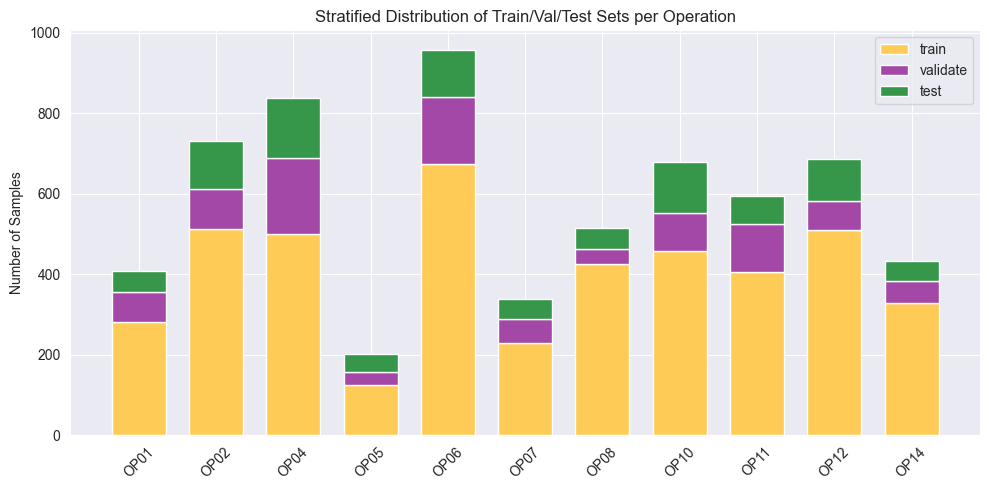


Unique file groups in Train: 580
Unique file groups in Val: 123
Unique file groups in Test: 125

File group overlap between Train and Val: 0
File group overlap between Train and Test: 0
File group overlap between Val and Test: 0


In [30]:
data_directory_not_normalized = "../data/final/new_selection/not_normalized/less_bad/Selected_data_grouped_windowed_downsampled_lessbad"
train_loader_no_norm, val_loader_no_norm, test_loader_no_norm, dataset_no_norm = stratified_group_split(data_directory=data_directory_not_normalized)

Using device: cuda
Epoch [1/30] - Train Loss: 345.5113, Train Acc: 0.8033 - Val Loss: 3.1693, Val Acc: 0.9052 
Epoch [2/30] - Train Loss: 5.8909, Train Acc: 0.9018 - Val Loss: 2.3774, Val Acc: 0.9202 
Epoch [3/30] - Train Loss: 3.0449, Train Acc: 0.9121 - Val Loss: 1.4577, Val Acc: 0.9251 
Epoch [4/30] - Train Loss: 2.1416, Train Acc: 0.9213 - Val Loss: 1.6178, Val Acc: 0.9072 
Epoch [5/30] - Train Loss: 1.4881, Train Acc: 0.9296 - Val Loss: 2.5845, Val Acc: 0.8184 
Epoch [6/30] - Train Loss: 1.2375, Train Acc: 0.9258 - Val Loss: 2.0701, Val Acc: 0.8733 
Epoch [7/30] - Train Loss: 1.0538, Train Acc: 0.9335 - Val Loss: 3.0412, Val Acc: 0.8024 
Epoch [8/30] - Train Loss: 0.8341, Train Acc: 0.9382 - Val Loss: 1.5607, Val Acc: 0.8812 
Epoch [9/30] - Train Loss: 0.7620, Train Acc: 0.9332 - Val Loss: 1.1602, Val Acc: 0.9331 
Epoch [10/30] - Train Loss: 0.8642, Train Acc: 0.9388 - Val Loss: 1.4159, Val Acc: 0.8433 
Epoch [11/30] - Train Loss: 0.5883, Train Acc: 0.9487 - Val Loss: 2.0564, Val 

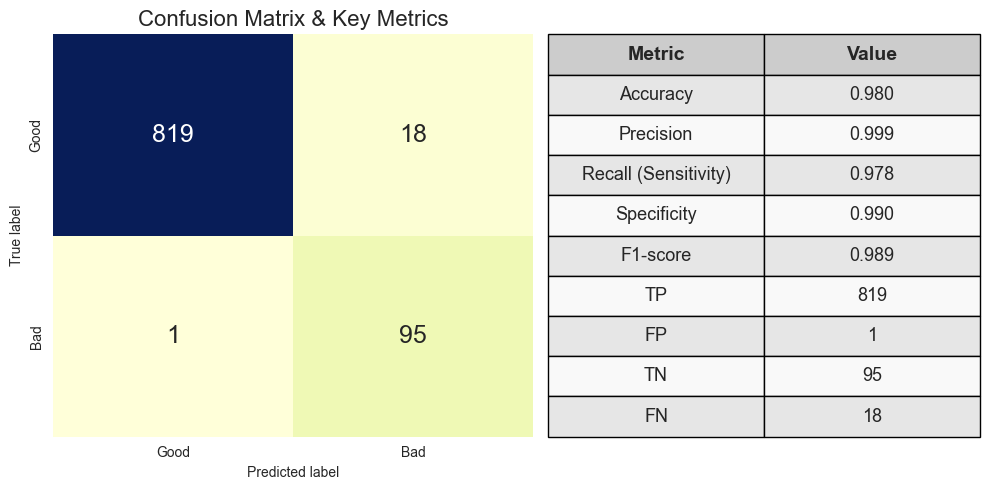

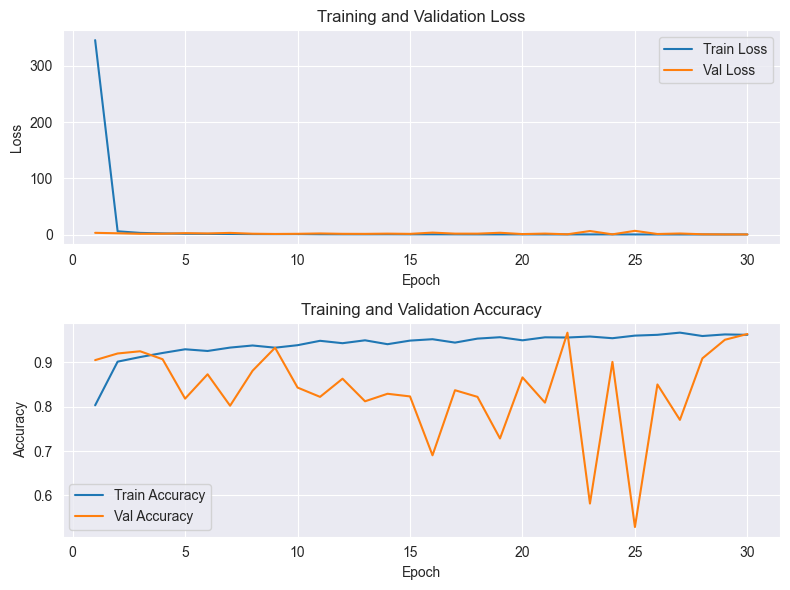

In [31]:
# ------------------------
#  Run Training & Evaluation for not normalized data
# ------------------------
# model = train_and_evaluate(train_loader, val_loader, test_loader)
best_model_unnormalized = train_and_evaluate(train_loader_no_norm, val_loader_no_norm, test_loader_no_norm)


In [32]:
# Save the trained model
torch.save(best_model_unnormalized.state_dict(), "../cnn1d_model15_noNorm.ckpt")
print("✅ Model saved to cnn1d_model15_noNorm.ckpt")
best_model_unnormalized.to(device)
best_model_unnormalized.eval()  # Switch to evaluation mode
print("✅ un_normallized Model loaded and ready for explanations")
print(f"✅ Model is structured as  \n {best_model}")


✅ Model saved to cnn1d_model15_noNorm.ckpt
✅ un_normallized Model loaded and ready for explanations
✅ Model is structured as  
 CNN1D_Wide(
  (conv1): Conv1d(3, 16, kernel_size=(25,), stride=(1,), padding=(12,))
  (pool1): MaxPool1d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  (dropout1): Dropout(p=0.2, inplace=False)
  (conv2): Conv1d(16, 32, kernel_size=(15,), stride=(1,), padding=(7,))
  (pool2): MaxPool1d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  (dropout2): Dropout(p=0.2, inplace=False)
  (conv3): Conv1d(32, 64, kernel_size=(9,), stride=(1,), padding=(4,))
  (pool3): MaxPool1d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  (dropout3): Dropout(p=0.2, inplace=False)
  (conv4): Conv1d(64, 128, kernel_size=(5,), stride=(1,), padding=(2,))
  (pool4): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout4): Dropout(p=0.2, inplace=False)
  (global_avg_pool): AdaptiveAvgPool1d(output_size=1)

### Explain the Model

### Load the model

In [8]:
from utils.baseline_xai import load_model
model_path = "../cnn1d_model_wide_new_2.ckpt"

best_model = load_model(model_path, device=device, model =CNN1D_Wide)

#### choose a good sample

In [85]:
# choose a Good sample
# Load a batch
sample_batch, label_batch = next(iter(test_loader))

random.seed(42)  # change it until you find a label 0
# Choose a random index
random_index = random.randint(0, len(sample_batch) - 1)

# Select the random sample and its corresponding label
sample = sample_batch[random_index]  # Shape: (3, 10000)
label = label_batch[random_index]    # Shape: ()

sample = sample.to(device)
label = label.to(device)

_, predicted_label = predict_single(best_model, sample)

# Print the selected sample and label
print(f"Random Index: {random_index}, Predicted_label:{predicted_label}, True_label:{label}")
print(sample, sample.shape)


Random Index: 28, Predicted_label:0, True_label:0
tensor([[-0.0831, -0.0072,  0.0304,  ..., -0.2831, -0.0413, -0.0137],
        [ 0.2577, -0.1714, -0.0656,  ..., -0.2232, -0.1374,  0.0790],
        [-0.0739, -0.0506,  0.0662,  ...,  0.1902, -0.0622,  0.1508]],
       device='cuda:0') torch.Size([3, 2000])


#### choose a bad sample


In [62]:
# Load a Bad sample

# Load a batch
sample_batch, label_batch = next(iter(train_loader))

random.seed(3)
# Choose a random index
random_index_b = random.randint(0, len(sample_batch) - 1)

# Select the random sample and its corresponding label
sample_b = sample_batch[random_index_b]  # Shape: (3, 10000)
label_b = label_batch[random_index_b]    # Shape: ()



sample_b = sample_b.to(device)
label_b = label_b.to(device)

_, predicted_label_b = predict_single(best_model, sample_b)


# Print the selected sample and label
print(f"Random Index: {random_index_b}, Predicted_label:{predicted_label_b}, True_label:{label_b}")
print(sample_b,sample_b.shape)


Random Index: 60, Predicted_label:1, True_label:1
tensor([[-0.0152, -0.0560, -0.0240,  ..., -1.4377, -1.9924, -2.1608],
        [-0.3281,  0.7171, -0.5859,  ..., -0.3913,  0.6619, -0.2208],
        [-0.0277, -0.1512,  0.2806,  ...,  0.5082, -0.5841,  0.2417]],
       device='cuda:0') torch.Size([3, 2000])


In [33]:
plt.style.use("seaborn-v0_8-dark-palette")

In [87]:
torch.cuda.empty_cache()
gc.collect()

0

### DFT-LRP Implementation

#### Time Domain Analysis for OK and NOK Samples


In [88]:
relevance_time, relevance_freq, signal_freq, input_signal, freqs, f_label = compute_basic_dft_lrp(
    model=best_model,
    sample=sample,  # Shape: (3, 2000) or torch tensor
    label=label,  # Use true label or None for prediction
    device=device
)
print(f"Sample {random_index} Label: {'Good' if f_label == 0 else 'Bad'}")

Input device in zennit_relevance: cuda:0
Model structure:
  - : CNN1D_Wide
  - conv1: Conv1d
  - pool1: MaxPool1d
  - dropout1: Dropout
  - conv2: Conv1d
  - pool2: MaxPool1d
  - dropout2: Dropout
  - conv3: Conv1d
  - pool3: MaxPool1d
  - dropout3: Dropout
  - conv4: Conv1d
  - pool4: MaxPool1d
  - dropout4: Dropout
  - global_avg_pool: AdaptiveAvgPool1d
  - fc1: Linear
  - fc2: Linear
  - dropout: Dropout
  - relu: LeakyReLU
Successfully registered hooks
Input device in zennit_relevance_lrp: cuda:0
Model output shape: torch.Size([1, 2])
values shape:torch.Size([1])
Target output shape: (torch.Size([1, 2]), tensor([[4.9425, 0.0000]], device='cuda:0'))
Computing frequency domain relevance...
Weight shape in create_fourier_weights: (2000, 2000)
Weight shape from dft_utils: (2000, 2000)
Weight shape after tensor conversion: torch.Size([2000, 2000])
Weight shape in create_fourier_weights: (2000, 2000)
Weight shape from dft_utils: (2000, 2000)
Weight shape after tensor conversion: torch.Si

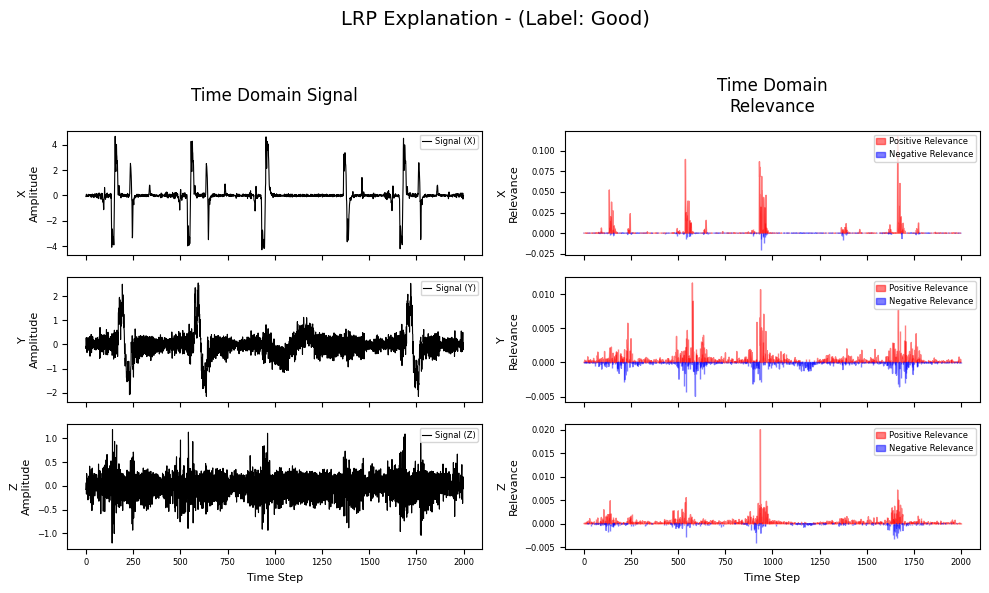

In [89]:
# Visualize LRP relevances, simpler function
visualize_lrp_single_sample(
    signal=input_signal,
    relevance=relevance_time,
    label=f_label)

Min relevance: -0.020073335617780685, Max relevance: 0.11722086369991302
Maximum Absolute Attribution in Axis 0: 0.03768707811832428
Maximum Absolute Attribution in Axis 1: 0.003642002586275339
Maximum Absolute Attribution in Axis 2: 0.00324059696868062


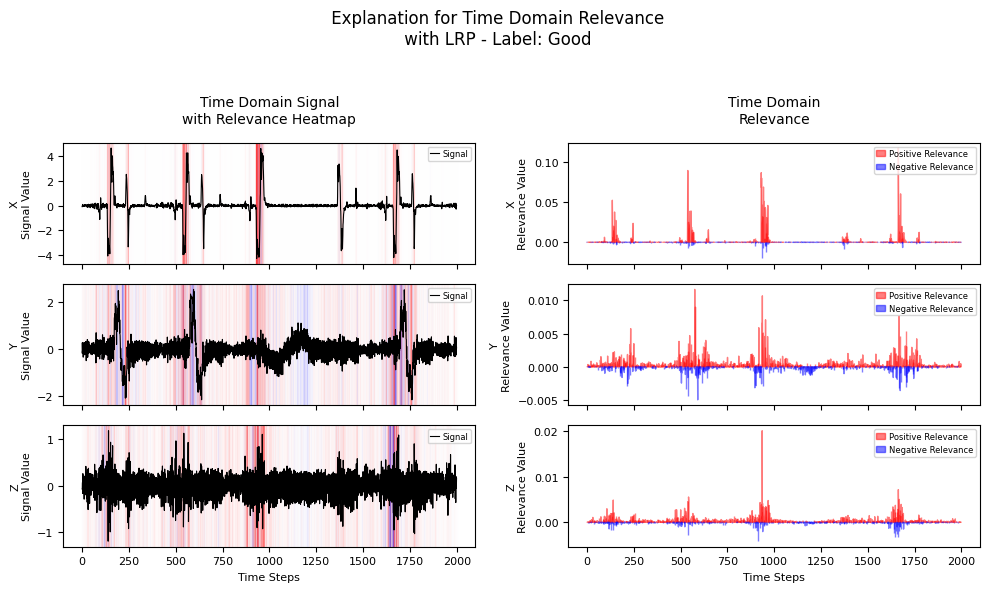

In [90]:
#Multi-axis representation, a bit cleaned code for all methods
# LRP visualization with mutual visualization function
print(f"Min relevance: {np.min(relevance_time)}, Max relevance: {np.max(relevance_time)}")
visualize_with_label_attribution(sample, relevance_time, label, "LRP")


In [91]:
relevance_time_b, relevance_freq_b, signal_freq_b, input_signal_b, freqs_b, f_label_b= compute_basic_dft_lrp(
    model=best_model,
    sample=sample_b,  # Shape: (3, 10000) or torch tensor
    label=label_b,  # Use true label or None for prediction
    device=device
)
print(f"Sample {random_index} Label: {'Good' if f_label_b == 0 else 'Bad'}")

Input device in zennit_relevance: cuda:0
Model structure:
  - : CNN1D_Wide
  - conv1: Conv1d
  - pool1: MaxPool1d
  - dropout1: Dropout
  - conv2: Conv1d
  - pool2: MaxPool1d
  - dropout2: Dropout
  - conv3: Conv1d
  - pool3: MaxPool1d
  - dropout3: Dropout
  - conv4: Conv1d
  - pool4: MaxPool1d
  - dropout4: Dropout
  - global_avg_pool: AdaptiveAvgPool1d
  - fc1: Linear
  - fc2: Linear
  - dropout: Dropout
  - relu: LeakyReLU
Successfully registered hooks
Input device in zennit_relevance_lrp: cuda:0
Model output shape: torch.Size([1, 2])
values shape:torch.Size([1])
Target output shape: (torch.Size([1, 2]), tensor([[0.0000, 3.0699]], device='cuda:0'))
Computing frequency domain relevance...
Weight shape in create_fourier_weights: (2000, 2000)
Weight shape from dft_utils: (2000, 2000)
Weight shape after tensor conversion: torch.Size([2000, 2000])
Weight shape in create_fourier_weights: (2000, 2000)
Weight shape from dft_utils: (2000, 2000)
Weight shape after tensor conversion: torch.Si

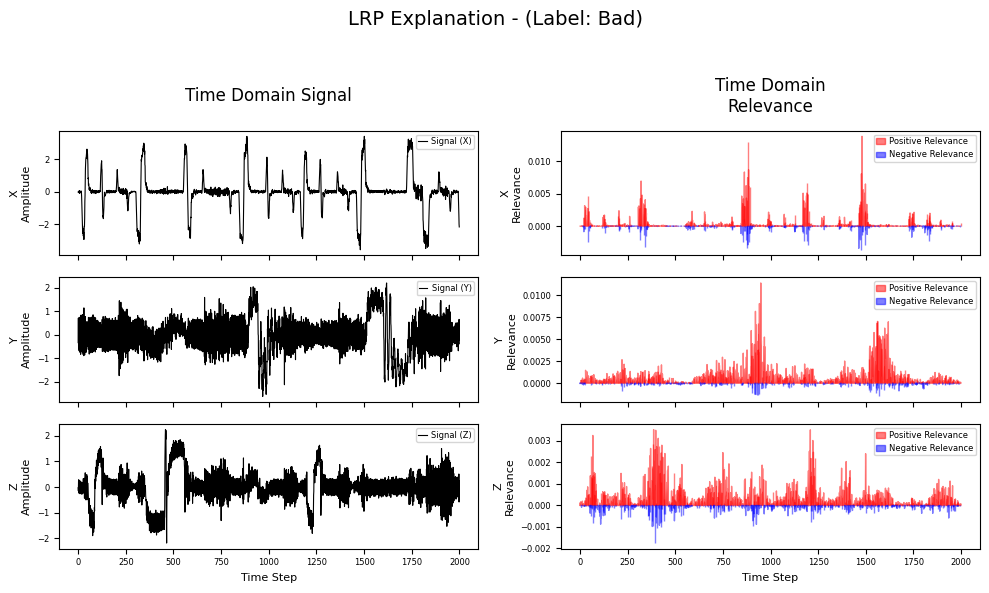

In [92]:
# Visualize LRP relevances
visualize_lrp_single_sample(
    signal=input_signal_b,
    relevance=relevance_time_b,
    label=f_label_b)

Min relevance: -0.0036310325376689434, Max relevance: 0.01383882388472557
Maximum Absolute Attribution in Axis 0: 0.004619704559445381
Maximum Absolute Attribution in Axis 1: 0.005164631642401218
Maximum Absolute Attribution in Axis 2: 0.0023092892952263355


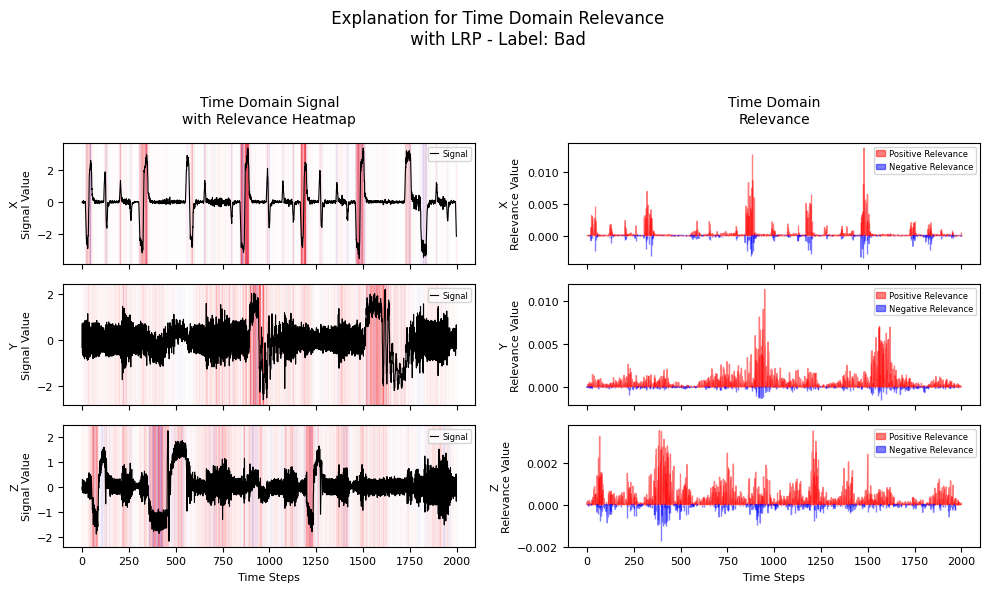

In [93]:
#Multi-axis representation
# LRP visualization with mutual visualization function
print(f"Min relevance: {np.min(relevance_time_b)}, Max relevance: {np.max(relevance_time_b)}")
visualize_with_label_attribution(sample_b, relevance_time_b, label_b, "LRP")


#### Time, and Frequency Domain Analysis for OK and NOK Samples

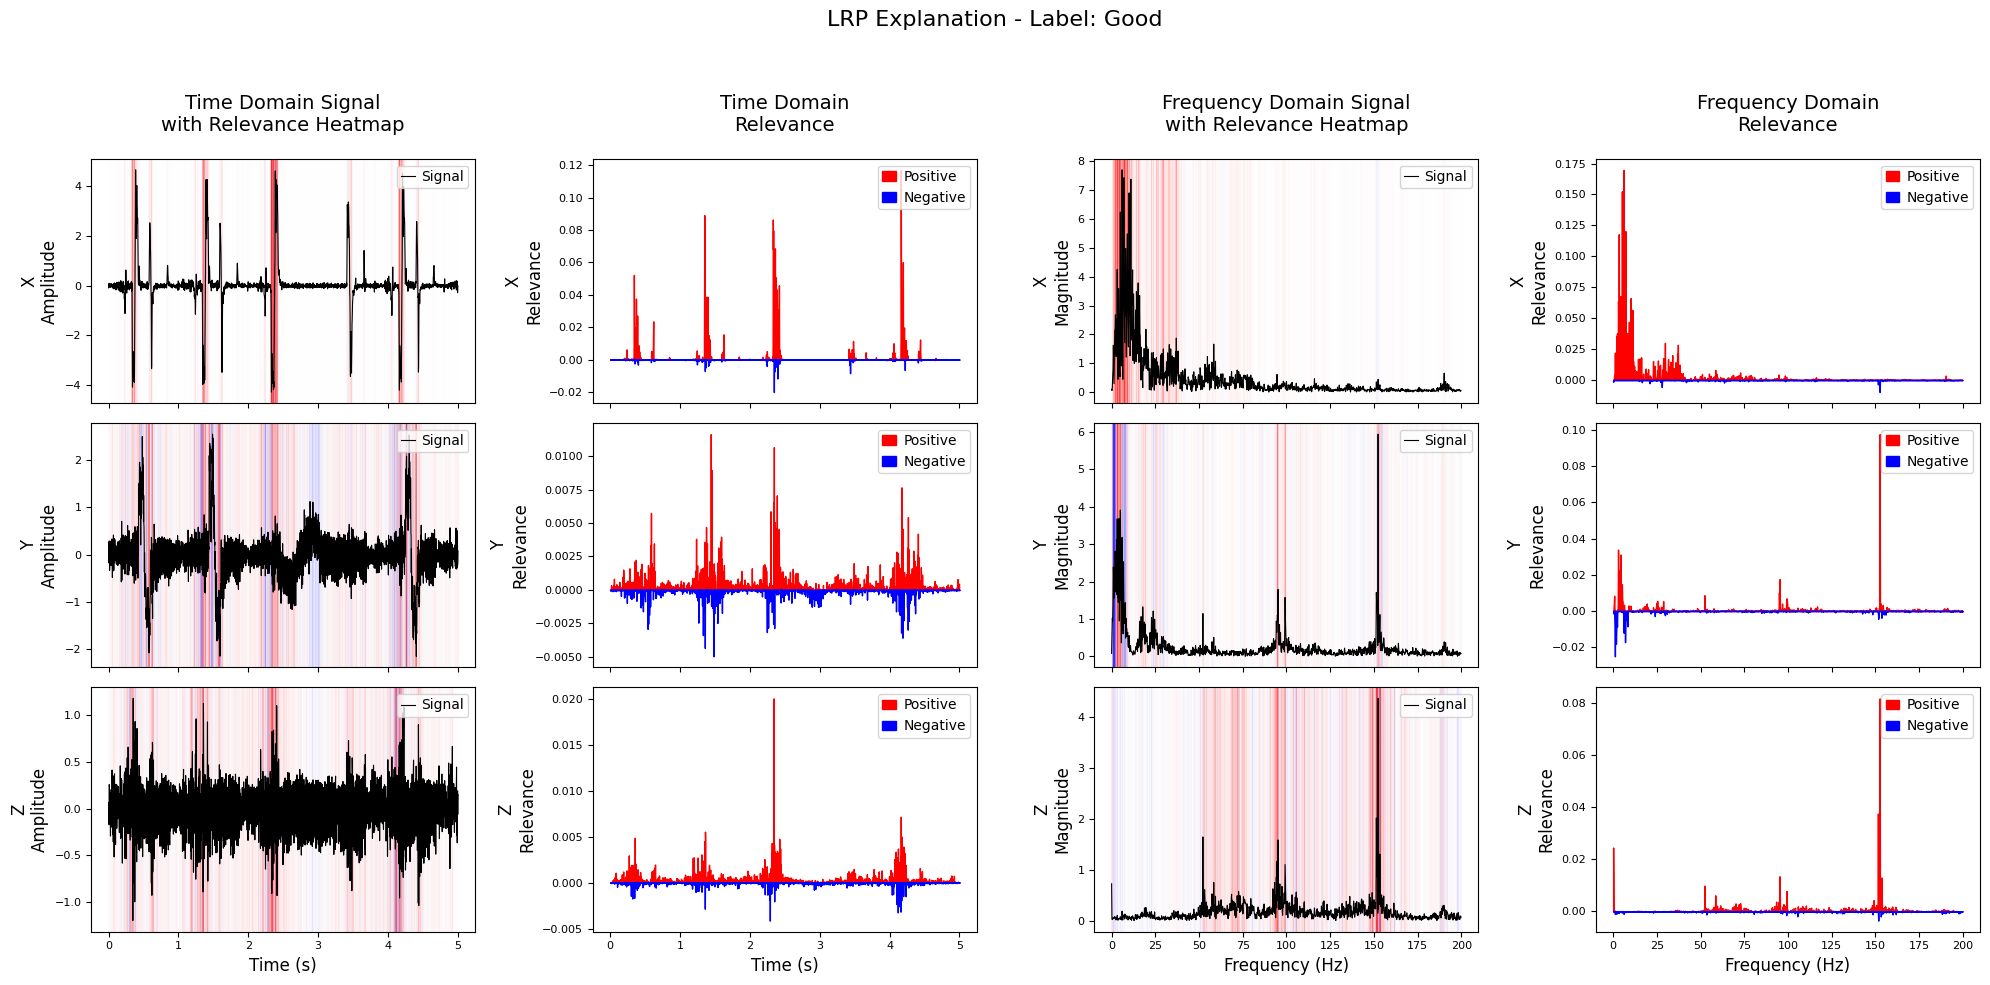

In [94]:
visualize_lrp_dft(
        relevance_time,
        relevance_freq,
        signal_freq,
        input_signal,
        freqs,
        f_label,
        axes_names=["X", "Y", "Z"],
        k_max=200,  # Maximum frequency in Hz
        signal_length=2000,
        sampling_rate=400,  # Sampling rate in Hz
        cmap="bwr"  # Colormap for relevance heatmap
)

In [ ]:
# run this to calculate and analyse the dft-lrp at the same time
# analyze_sample_with_dft_lrp(best_model, sample, label,device)

In [ ]:
# run this to calculate and analyse the dft-lrp at the same time
# analyze_sample_with_dft_lrp(best_model, sample_b, label_b,device)


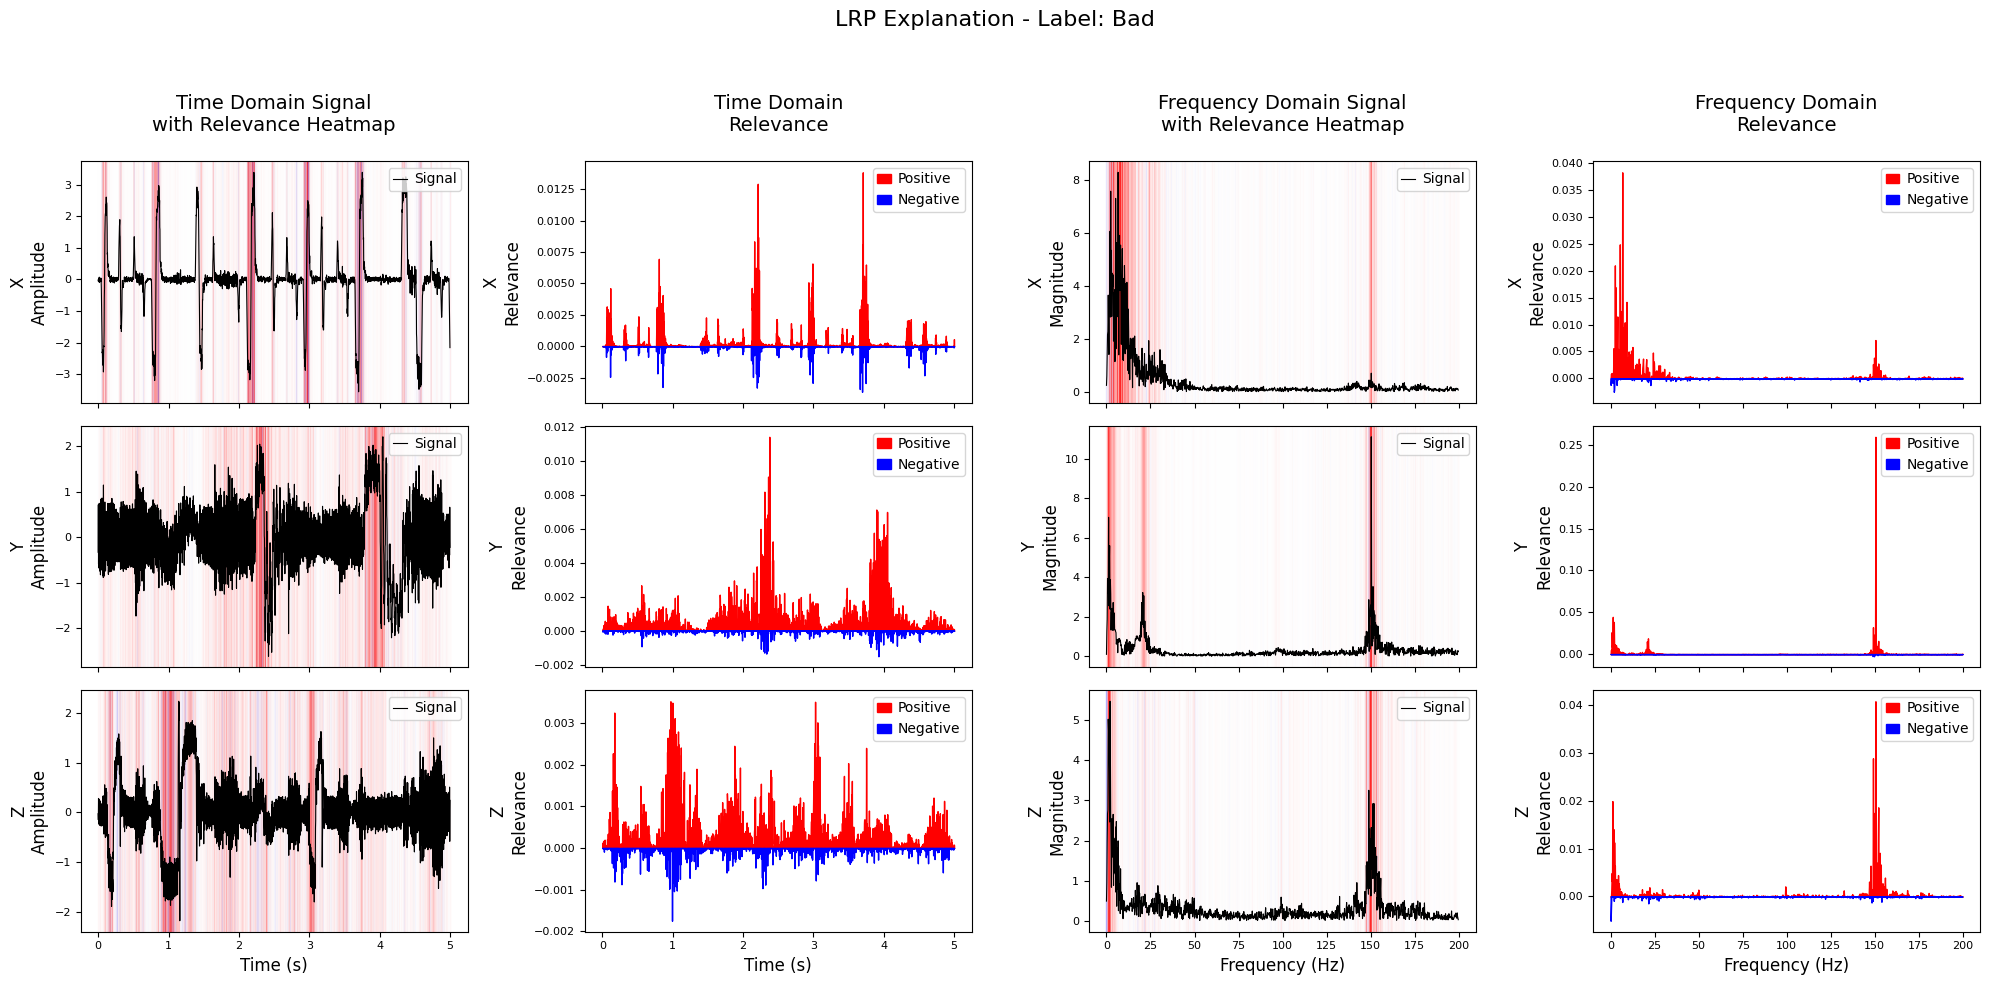

In [95]:
visualize_lrp_dft(
        relevance_time_b,
        relevance_freq_b,
        signal_freq_b,
        input_signal_b,
        freqs_b,
        f_label_b,
        axes_names=["X", "Y", "Z"],
        k_max=200,  # Maximum frequency in Hz
        signal_length=2000,
        sampling_rate=400,  # Sampling rate in Hz
        cmap="bwr"  # Colormap for relevance heatmap
)

#### Time, Frequency, and Time-Frequency domain for OK and NOK Samples

In [96]:
relevance_time_dftlrp, relevance_freq_dftlrp, signal_freq_dftlrp, relevance_timefreq_dftlrp, signal_timefreq_dftlrp, input_signal_dftlrp, freqs_dftlrp, f_label_dftlrp = compute_enhanced_dft_lrp(model=best_model,
            sample=sample,
            label=label,  # Use true label for explanation
            device=device,
            signal_length=2000,
            leverage_symmetry=True,
            window_width=256,  # Standard spectrogram window size
            window_shift=128,  # 50% overlap is standard for spectrograms
            window_shape="rectangle"
        )

Input device in zennit_relevance: cuda:0
Model structure:
  - : CNN1D_Wide
  - conv1: Conv1d
  - pool1: MaxPool1d
  - dropout1: Dropout
  - conv2: Conv1d
  - pool2: MaxPool1d
  - dropout2: Dropout
  - conv3: Conv1d
  - pool3: MaxPool1d
  - dropout3: Dropout
  - conv4: Conv1d
  - pool4: MaxPool1d
  - dropout4: Dropout
  - global_avg_pool: AdaptiveAvgPool1d
  - fc1: Linear
  - fc2: Linear
  - dropout: Dropout
  - relu: LeakyReLU
Successfully registered hooks
Input device in zennit_relevance_lrp: cuda:0
Model output shape: torch.Size([1, 2])
values shape:torch.Size([1])
Target output shape: (torch.Size([1, 2]), tensor([[4.9425, 0.0000]], device='cuda:0'))
Computing frequency domain relevance...
Weight shape in create_fourier_weights: (2000, 2000)
Weight shape from dft_utils: (2000, 2000)
Weight shape after tensor conversion: torch.Size([2000, 2000])
Weight shape in create_fourier_weights: (2000, 2000)
Weight shape from dft_utils: (2000, 2000)
Weight shape after tensor conversion: torch.Si

In [98]:
torch.cuda.empty_cache()
gc.collect()

0

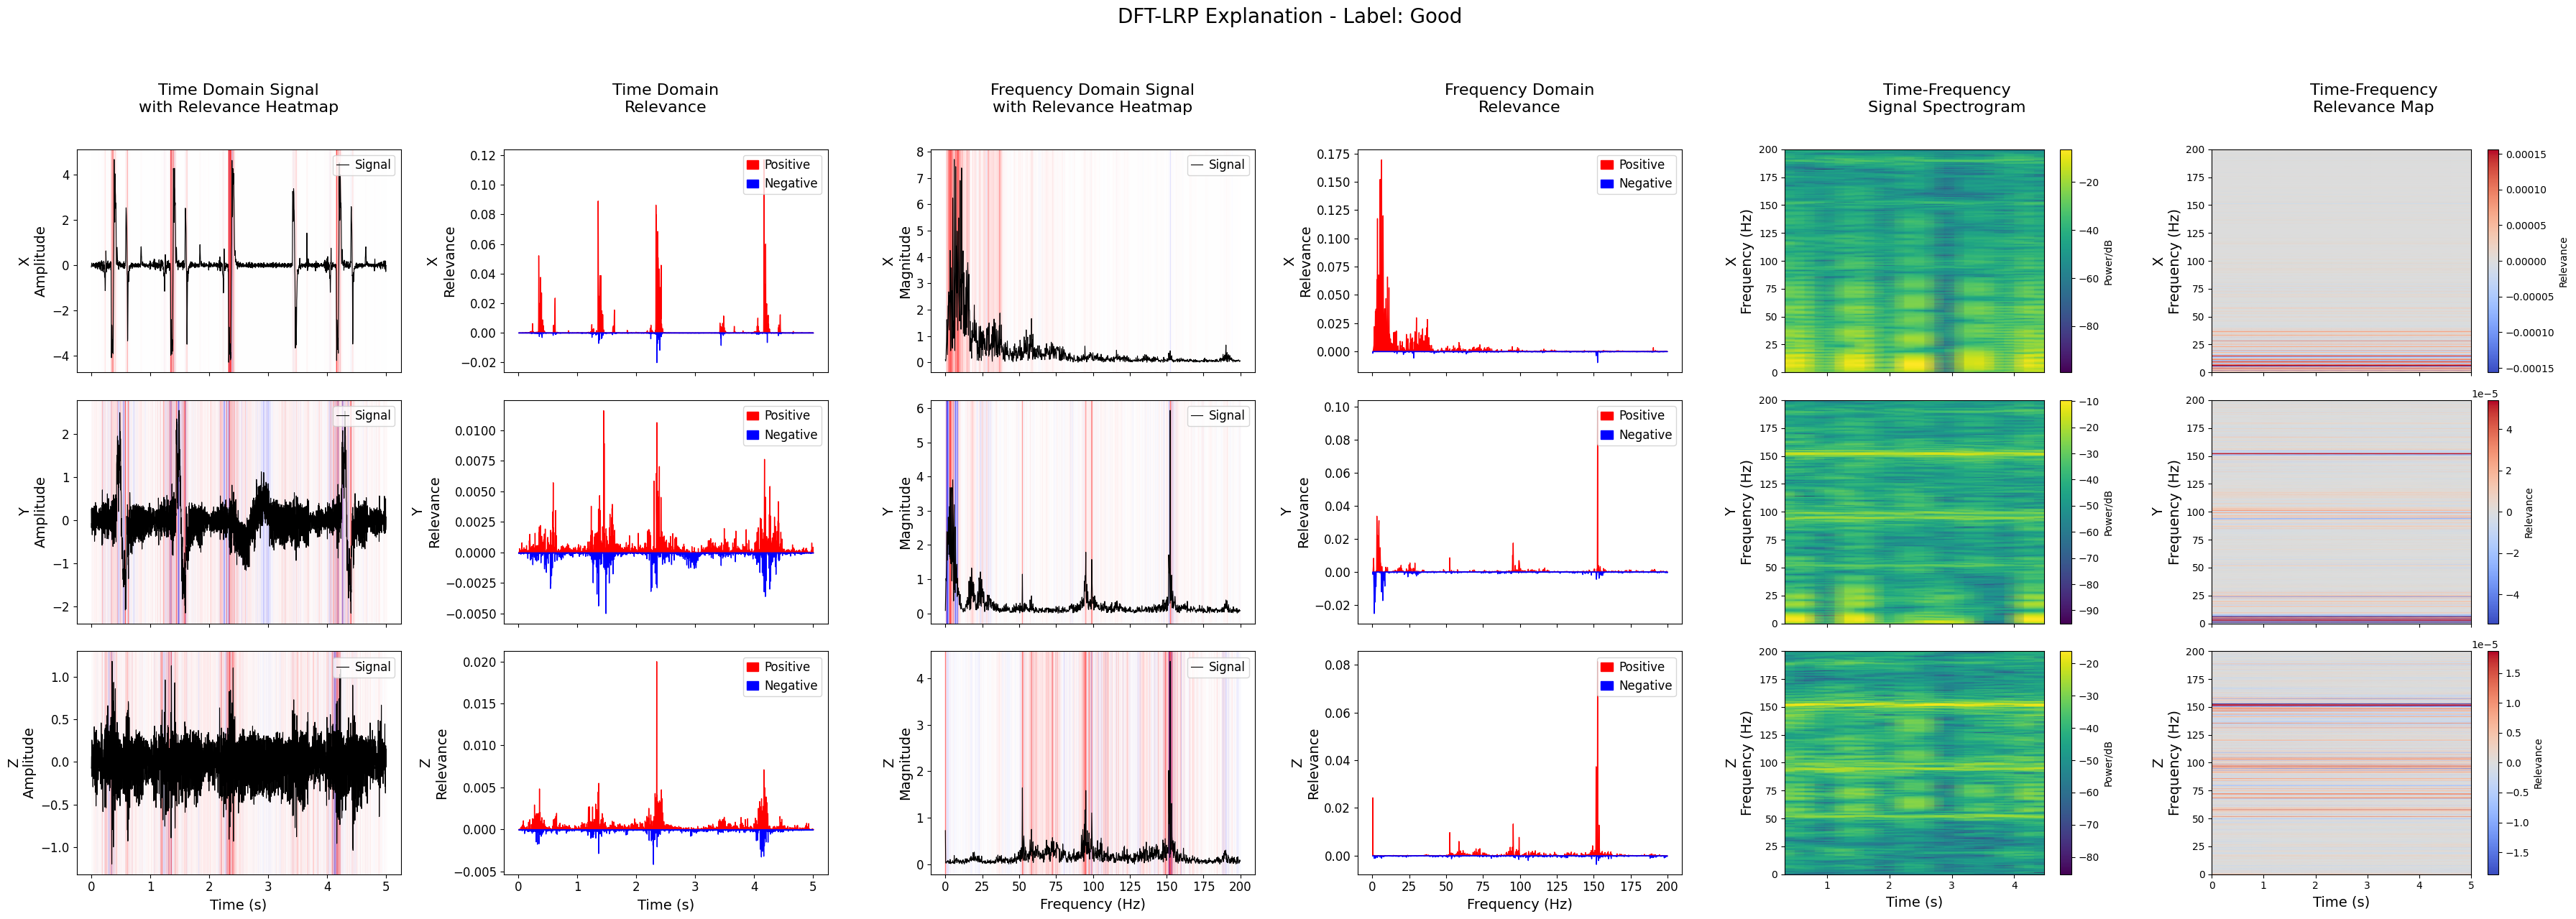

In [99]:
visualize_hybrid_timefreq(
        relevance_time_dftlrp,
        relevance_freq_dftlrp,
        signal_freq_dftlrp,
        relevance_timefreq_dftlrp,
        signal_timefreq_dftlrp,
        input_signal_dftlrp,
        freqs_dftlrp,
        f_label_dftlrp,
        axes_names=["X", "Y", "Z"],
        k_max=200,  # Maximum frequency in Hz
        signal_length=2000,
        sampling_rate=400,  # Sampling rate in Hz
        cmap="bwr"  # Colormap for relevance heatmap
)

In [ ]:
# use this for calculating relevances over time, freq and time-freq and their visualization at the same time
# analyze_sample_with_spectrograms(best_model, sample, label, device)  use this for plotting  both signal and relevance using dft-lrp class
# analyze_sample_with_hybrid_visualization(best_model, sample, label, device)   # use this for plotting signal with scipy spectrogram and relevance with dftlr class

In [100]:
relevance_time_dftlrp_b, relevance_freq_dftlrp_b, signal_freq_dftlrp_b, relevance_timefreq_dftlrp_b, signal_timefreq_dftlrp_b, input_signal_dftlrp_b, freqs_dftlrp_b, f_label_dftlrp_b = compute_enhanced_dft_lrp(model=best_model,
            sample=sample_b,
            label=label_b,  # Use true label for explanation
            device=device,
            signal_length=2000,
            leverage_symmetry=True,
            window_width=256,  # Standard spectrogram window size
            window_shift=128,  # 50% overlap is standard for spectrograms
            window_shape="rectangle"
        )

Input device in zennit_relevance: cuda:0
Model structure:
  - : CNN1D_Wide
  - conv1: Conv1d
  - pool1: MaxPool1d
  - dropout1: Dropout
  - conv2: Conv1d
  - pool2: MaxPool1d
  - dropout2: Dropout
  - conv3: Conv1d
  - pool3: MaxPool1d
  - dropout3: Dropout
  - conv4: Conv1d
  - pool4: MaxPool1d
  - dropout4: Dropout
  - global_avg_pool: AdaptiveAvgPool1d
  - fc1: Linear
  - fc2: Linear
  - dropout: Dropout
  - relu: LeakyReLU
Successfully registered hooks
Input device in zennit_relevance_lrp: cuda:0
Model output shape: torch.Size([1, 2])
values shape:torch.Size([1])
Target output shape: (torch.Size([1, 2]), tensor([[0.0000, 3.0699]], device='cuda:0'))
Computing frequency domain relevance...
Weight shape in create_fourier_weights: (2000, 2000)
Weight shape from dft_utils: (2000, 2000)
Weight shape after tensor conversion: torch.Size([2000, 2000])
Weight shape in create_fourier_weights: (2000, 2000)
Weight shape from dft_utils: (2000, 2000)
Weight shape after tensor conversion: torch.Si

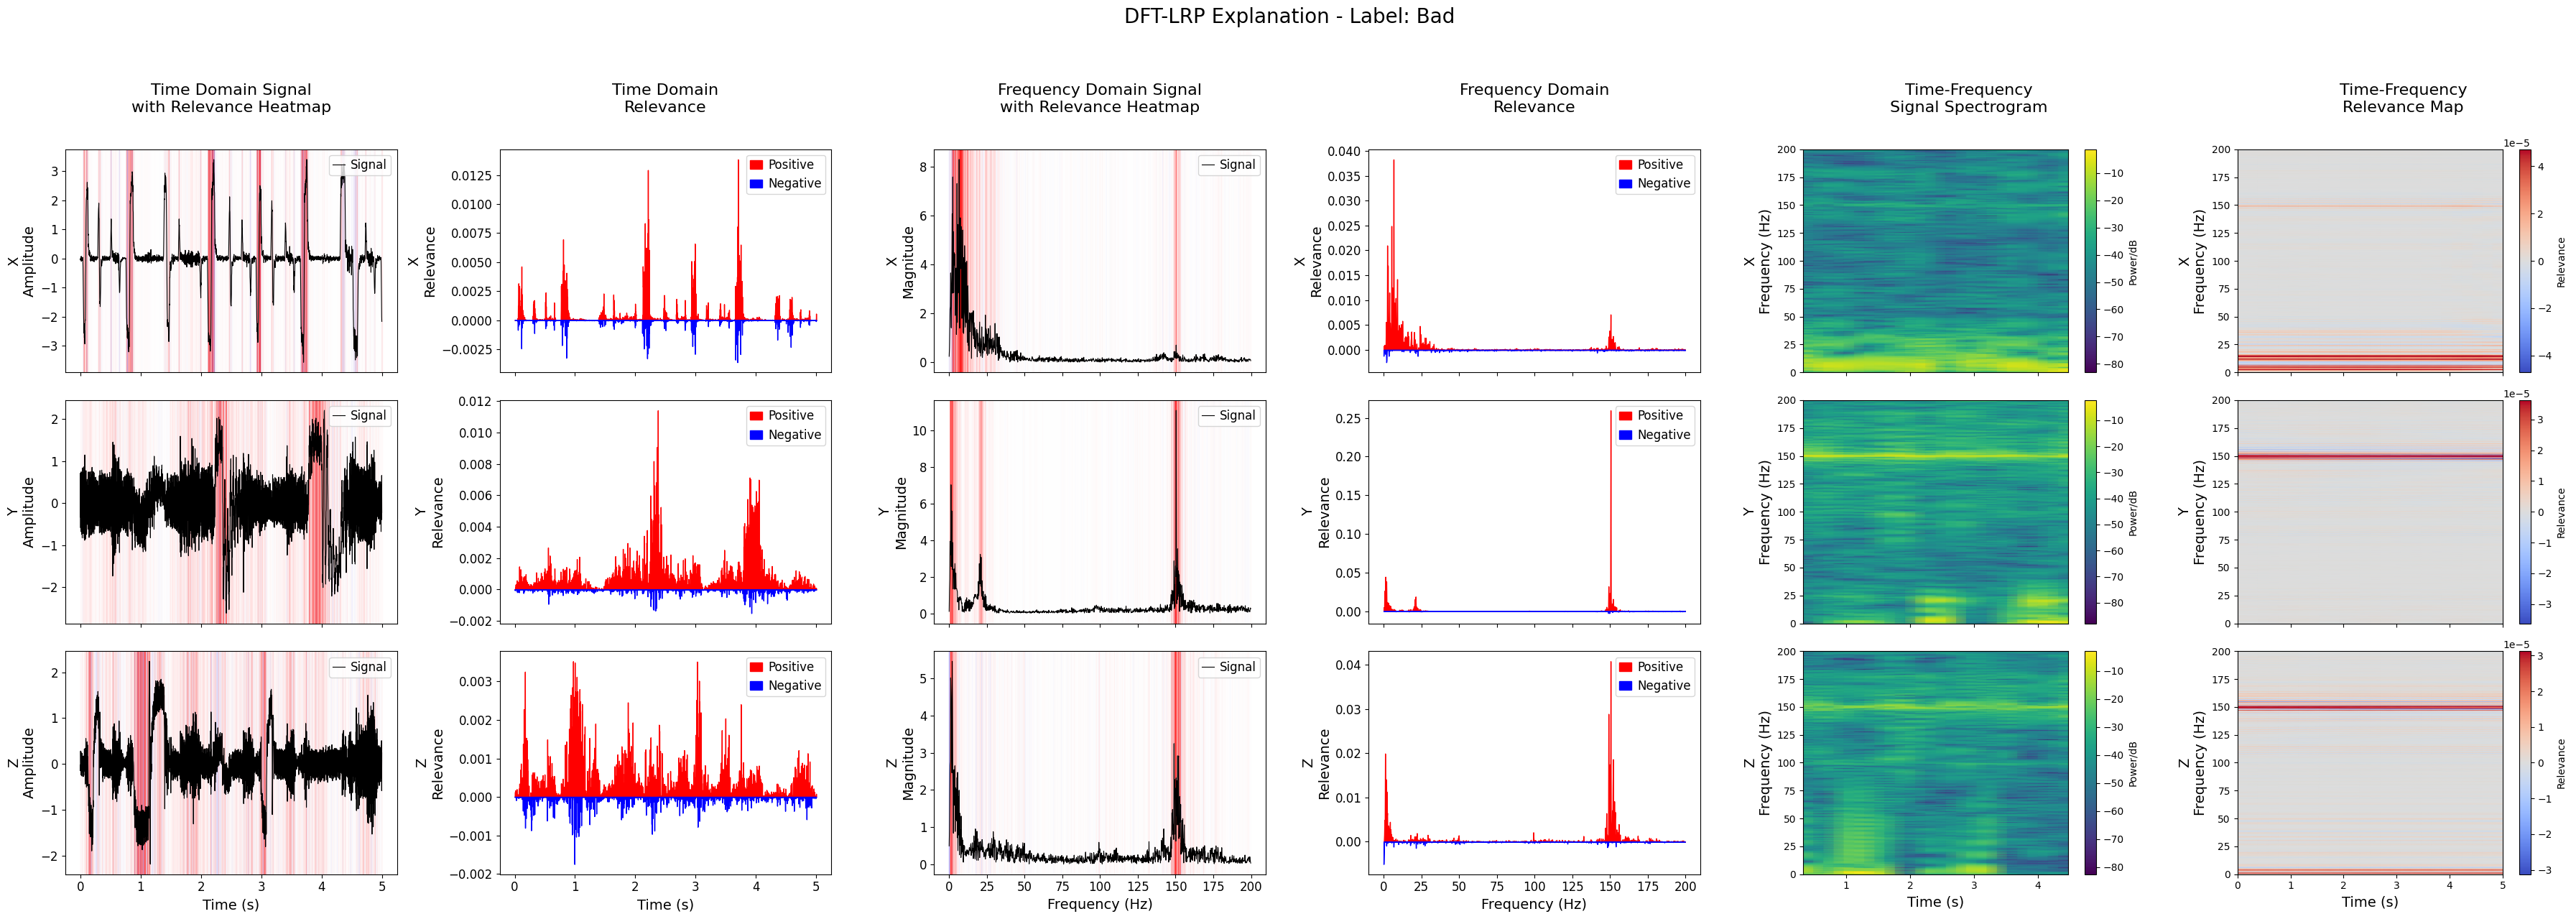

In [101]:
visualize_hybrid_timefreq(
        relevance_time_dftlrp_b,
        relevance_freq_dftlrp_b,
        signal_freq_dftlrp_b,
        relevance_timefreq_dftlrp_b,
        signal_timefreq_dftlrp_b,
        input_signal_dftlrp_b,
        freqs_dftlrp_b,
        f_label_dftlrp_b,
        axes_names=["X", "Y", "Z"],
        k_max=200,  # Maximum frequency in Hz
        signal_length=2000,
        sampling_rate=400,  # Sampling rate in Hz
        cmap="bwr"  # Colormap for relevance heatmap
)

In [103]:
torch.cuda.empty_cache()
gc.collect()

0

In [ ]:
# use this for calculating relevances over time, freq and time-freq and their visualization at the same time
# analyze_sample_with_spectrograms(best_model, sample_b, label_b, device)  use this for plotting  both signal and relevance using dft-lrp class
# analyze_sample_with_hybrid_visualization(best_model, sample_b, label_b, device)


In [104]:
#Multi-axis representation
# Global Attribution over frequency with LRP
summary_lrp_freq = summarize_attributions(relevance_freq)  # Pass your attributions here
# Flatten the summary dictionary and create a DataFrame
data_lrp_freq = []
for axis, values in summary_lrp_freq.items():
    row = {"Axis": axis}
    row.update(values)
    data_lrp_freq.append(row)

# Create the DataFrame
df_summary_lrp_freq = pd.DataFrame(data_lrp_freq)

# Display the DataFrame as a table
print(df_summary_lrp_freq)

     Axis  Positive Count  Total Positive Relevance  \
0  Axis 0             714                  2.680845   
1  Axis 1             617                  0.621758   
2  Axis 2             599                  0.489446   

   Average Positive Relevance  Negative Count  Total Negative Relevance  \
0                    0.003755             287                 -0.086388   
1                    0.001008             384                 -0.262264   
2                    0.000817             402                 -0.087399   

   Average Negative Relevance  Total Relevance (Pos + Neg)  \
0                   -0.000301                     2.594457   
1                   -0.000683                     0.359493   
2                   -0.000217                     0.402048   

   Average Relevance (Pos + Neg)  
0                       0.002592  
1                       0.000359  
2                       0.000402  


In [105]:
#Multi-axis representation
# Global Attribution over frequency with LRP
summary_lrp_t = summarize_attributions(relevance_time)  # Pass your attributions here
# Flatten the summary dictionary and create a DataFrame
data_lrp_t = []
for axis, values in summary_lrp_t.items():
    row = {"Axis": axis}
    row.update(values)
    data_lrp_t.append(row)

# Create the DataFrame
df_summary_lrp_t = pd.DataFrame(data_lrp_t)

# Display the DataFrame as a table
print(df_summary_lrp_t)

     Axis  Positive Count  Total Positive Relevance  \
0  Axis 0            1170                  2.780330   
1  Axis 1            1271                  0.596308   
2  Axis 2            1390                  0.521972   

   Average Positive Relevance  Negative Count  Total Negative Relevance  \
0                    0.002376             830                 -0.185301   
1                    0.000469             729                 -0.236073   
2                    0.000376             610                 -0.117758   

   Average Negative Relevance  Total Relevance (Pos + Neg)  \
0                   -0.000223                     2.595029   
1                   -0.000324                     0.360236   
2                   -0.000193                     0.404214   

   Average Relevance (Pos + Neg)  
0                       0.001298  
1                       0.000180  
2                       0.000202  


In [106]:
#Multi-axis representation
# Global Attribution over frequency with LRP
summary_lrp_t = summarize_attributions(relevance_timefreq_dftlrp)  # Pass your attributions here
# Flatten the summary dictionary and create a DataFrame
data_lrp_t = []
for axis, values in summary_lrp_t.items():
    row = {"Axis": axis}
    row.update(values)
    data_lrp_t.append(row)

# Create the DataFrame
df_summary_lrp_t = pd.DataFrame(data_lrp_t)

# Display the DataFrame as a table
print(df_summary_lrp_t)

     Axis  Positive Count  Total Positive Relevance  \
0  Axis 0            8230        0.113978+0.000000j   
1  Axis 1            7605        0.039800+0.000000j   
2  Axis 2            7952        0.024676+0.000000j   

   Average Positive Relevance  Negative Count  Total Negative Relevance  \
0          0.000014+0.000000j            5784       -0.041195+0.000000j   
1          0.000005+0.000000j            6409       -0.026800+0.000000j   
2          0.000003+0.000000j            6062       -0.010410+0.000000j   

   Average Negative Relevance  Total Relevance (Pos + Neg)  \
0         -0.000007+0.000000j           0.072783+0.000000j   
1         -0.000004+0.000000j           0.012999+0.000000j   
2         -0.000002+0.000000j           0.014266+0.000000j   

                    Average Relevance (Pos + Neg)  
0  5.193610e-06+0.000000e+                    00j  
1  9.275941e-07+0.000000e+                    00j  
2  1.017986e-06+0.000000e+                    00j  


In [107]:
import gc

# Before calling your function
if torch.cuda.is_available():
    torch.cuda.empty_cache()
gc.collect()


0

#### FFT-LRP implementation

In [ ]:
relevance_time_fft, relevance_freq_fft, signal_freq_fft, relevance_timefreq_fft, signal_timefreq_fft, input_signal_fft, freqs_fft, predicted_label_fft = compute_fft_lrp_relevance(
        model=best_model,
        sample=sample,
        label=None,
        signal_length=2000,
        sampling_rate=400,
        compute_timefreq=True,
        window_shift=64,  # Increased to reduce memory usage
        window_width=128,
        window_shape="rectangle"
    )

In [ ]:
# Global Attribution for FFT_LRP over frequency
summary_fft_freq = summarize_attributions(relevance_freq_fft)  # Pass your attributions here
# Flatten the summary dictionary and create a DataFrame
data_fft_freq = []
for axis, values in summary_fft_freq.items():
    row = {"Axis": axis}
    row.update(values)
    data_fft_freq.append(row)

# Create the DataFrame
df_summary_fft_freq = pd.DataFrame(data_fft_freq)

# Display the DataFrame as a table
print(df_summary_fft_freq)

In [ ]:
# Global Attribution for FFT_LRP over time frequency
summary_fft_timefreq = summarize_attributions(relevance_timefreq_fft)  # Pass your attributions here
# Flatten the summary dictionary and create a DataFrame
data_fft_timefreq = []
for axis, values in summary_fft_timefreq.items():
    row = {"Axis": axis}
    row.update(values)
    data_fft_timefreq.append(row)

# Create the DataFrame
df_summary_fft_timefreq = pd.DataFrame(data_fft_timefreq)

# Display the DataFrame as a table
print(df_summary_fft_timefreq)

In [ ]:
# Visualize
visualize_lrp_fft(
    relevance_time=relevance_time_fft,
    relevance_freq=relevance_freq_fft,
    signal_freq=signal_freq_fft,
    relevance_timefreq=relevance_timefreq_fft,
    signal_timefreq=signal_timefreq_fft,
    input_signal=input_signal_fft,
    freqs=freqs_fft,
    predicted_label=predicted_label_fft,
    signal_length=2000,
    sampling_rate=400,
    k_max=1000
)

### Baseline XAI

Min relevance: -0.510051429271698, Max relevance: 0.42245784401893616
Maximum Absolute Attribution in Axis 0: 0.2836313247680664
Maximum Absolute Attribution in Axis 1: 0.25947803258895874
Maximum Absolute Attribution in Axis 2: 0.24830521643161774


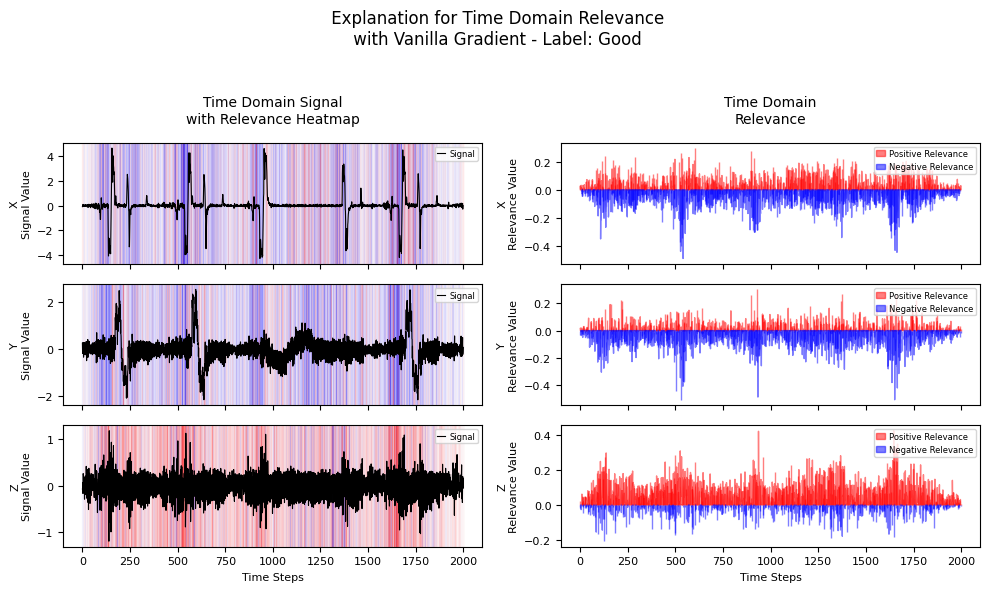

In [108]:
# vanilla gradient method
grad_attr, _ = gradient_relevance(best_model, sample)
print(f"Min relevance: {np.min(grad_attr.detach().cpu().numpy())}, Max relevance: {np.max(grad_attr.detach().cpu().numpy())}")
visualize_with_label_attribution(sample, grad_attr, label, "Vanilla Gradient")

Min relevance: -0.12141013890504837, Max relevance: 0.12508174777030945
Maximum Absolute Attribution in Axis 0: 0.08728489279747009
Maximum Absolute Attribution in Axis 1: 0.07831048965454102
Maximum Absolute Attribution in Axis 2: 0.0823259949684143


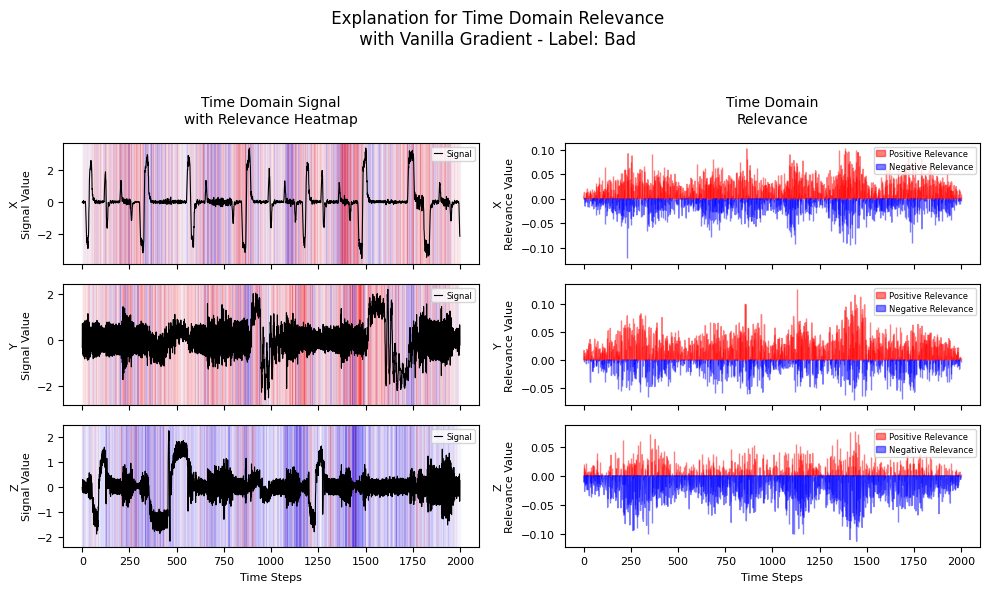

In [109]:
# vanilla gradient method
grad_attr_b, _ = gradient_relevance(best_model, sample_b)
print(f"Min relevance: {np.min(grad_attr_b.detach().cpu().numpy())}, Max relevance: {np.max(grad_attr_b.detach().cpu().numpy())}")
visualize_with_label_attribution(sample_b, grad_attr_b, label_b, "Vanilla Gradient")

Min relevance: -1.1110457181930542, Max relevance: 1.8763515949249268
Maximum Absolute Attribution in Axis 0: 0.5663243532180786
Maximum Absolute Attribution in Axis 1: 0.21143564581871033
Maximum Absolute Attribution in Axis 2: 0.0958477184176445


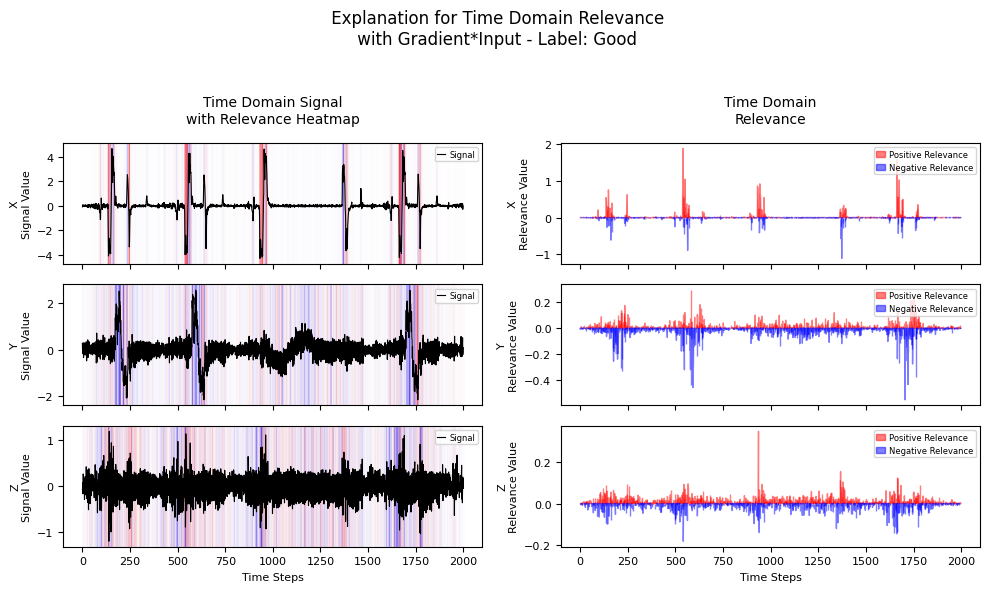

In [110]:
# Grad*Input Method
grad_input_attr, _ = grad_times_input_relevance(best_model, sample)

print(f"Min relevance: {np.min(grad_input_attr.detach().cpu().numpy())}, Max relevance: {np.max(grad_input_attr.detach().cpu().numpy())}")
visualize_with_label_attribution(sample, grad_input_attr, label, "Gradient*Input")


Min relevance: -0.304604709148407, Max relevance: 0.23956401646137238
Maximum Absolute Attribution in Axis 0: 0.1366044580936432
Maximum Absolute Attribution in Axis 1: 0.08006259799003601
Maximum Absolute Attribution in Axis 2: 0.06128939241170883


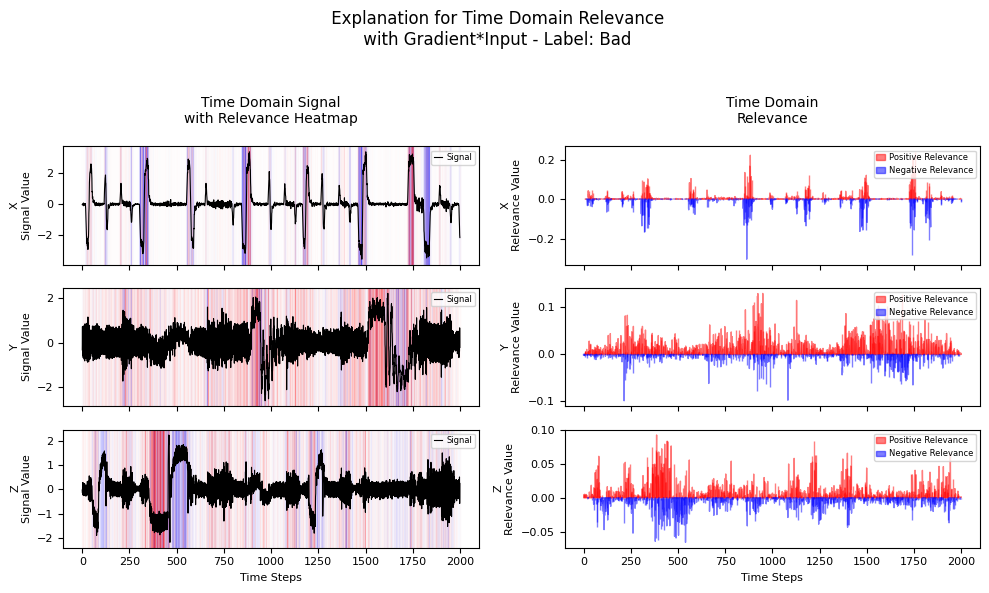

In [111]:
# Grad*Input
grad_input_attr_b, _ = grad_times_input_relevance(best_model, sample_b)
print(f"Min relevance: {np.min(grad_input_attr_b.detach().cpu().numpy())}, Max relevance: {np.max(grad_input_attr_b.detach().cpu().numpy())}")
visualize_with_label_attribution(sample_b, grad_input_attr_b, label_b, "Gradient*Input")

In [112]:
# Example usage
summary_b_g = summarize_attributions(grad_input_attr_b.detach().cpu().numpy())  # Pass your attributions here

# Flatten the summary dictionary and create a DataFrame
data_b_g = []
for axis, values in summary_b_g.items():
    row = {"Axis": axis}
    row.update(values)
    data_b_g.append(row)

# Create the DataFrame
df_summary_b_g = pd.DataFrame(data_b_g)

# Display the DataFrame as a table
print(df_summary_b_g)


     Axis  Positive Count  Total Positive Relevance  \
0  Axis 0            1144                  9.523378   
1  Axis 1            1318                 21.157272   
2  Axis 2            1100                 10.997026   

   Average Positive Relevance  Negative Count  Total Negative Relevance  \
0                    0.008325             856                -13.188632   
1                    0.016053             682                 -6.298631   
2                    0.009997             900                 -7.318629   

   Average Negative Relevance  Total Relevance (Pos + Neg)  \
0                   -0.015407                    -3.665254   
1                   -0.009236                    14.858642   
2                   -0.008132                     3.678397   

   Average Relevance (Pos + Neg)  
0                      -0.001833  
1                       0.007429  
2                       0.001839  


In [113]:
# Example usage
summary_g = summarize_attributions(grad_input_attr.detach().cpu().numpy())  # Pass your attributions here
# Flatten the summary dictionary and create a DataFrame
data_g = []
for axis, values in summary_g.items():
    row = {"Axis": axis}
    row.update(values)
    data_g.append(row)

# Create the DataFrame
df_summary_g = pd.DataFrame(data_g)

# Display the DataFrame as a table
print(df_summary_g)

     Axis  Positive Count  Total Positive Relevance  \
0  Axis 0             900                 42.932777   
1  Axis 1             879                 15.945408   
2  Axis 2            1058                 14.532919   

   Average Positive Relevance  Negative Count  Total Negative Relevance  \
0                    0.047703            1100                -22.285980   
1                    0.018140            1121                -30.494110   
2                    0.013736             942                -14.558437   

   Average Negative Relevance  Total Relevance (Pos + Neg)  \
0                   -0.020260                    20.646797   
1                   -0.027203                   -14.548702   
2                   -0.015455                    -0.025518   

   Average Relevance (Pos + Neg)  
0                       0.010323  
1                      -0.007274  
2                      -0.000013  


Min relevance: -0.7685258984565735, Max relevance: 0.46844717860221863
Maximum Absolute Attribution in Axis 0: 0.3258025348186493
Maximum Absolute Attribution in Axis 1: 0.13439612090587616
Maximum Absolute Attribution in Axis 2: 0.08363208174705505


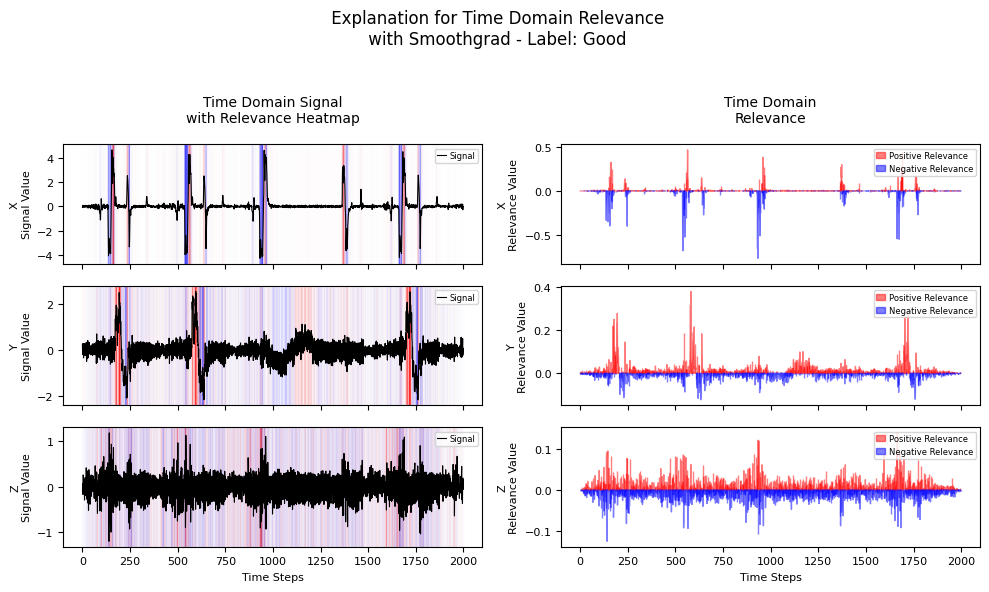

In [114]:
# SmoothGrad
smoothgrad_attr, _ = smoothgrad_relevance(best_model, sample)
print(f"Min relevance: {np.min(smoothgrad_attr.detach().cpu().numpy())}, Max relevance: {np.max(smoothgrad_attr.detach().cpu().numpy())}")
visualize_with_label_attribution(sample, smoothgrad_attr, label, "Smoothgrad")


Min relevance: -0.17823611199855804, Max relevance: 0.17819075286388397
Maximum Absolute Attribution in Axis 0: 0.10078388452529907
Maximum Absolute Attribution in Axis 1: 0.0677473396062851
Maximum Absolute Attribution in Axis 2: 0.05391545966267586


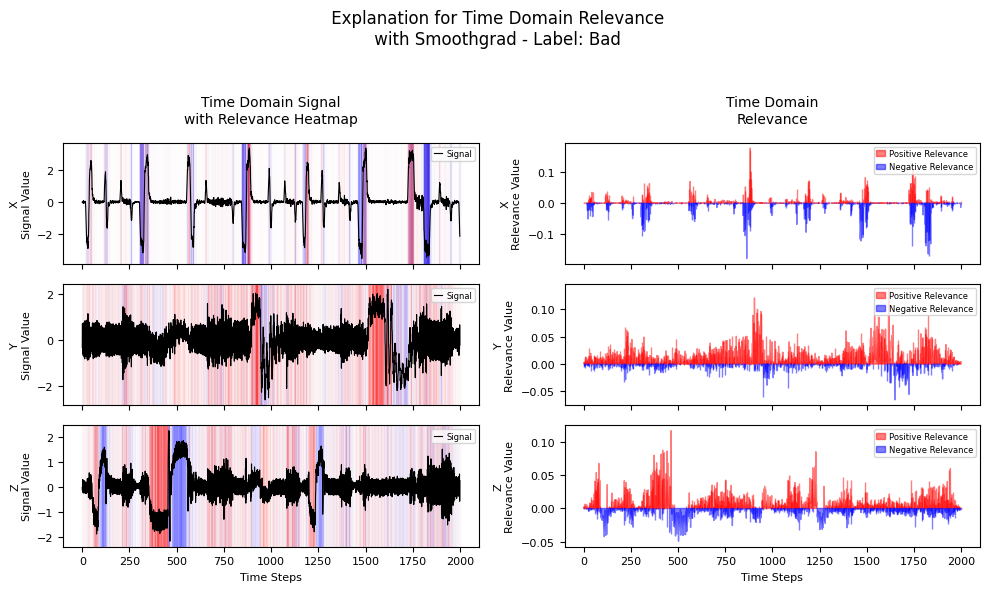

In [115]:
# SmoothGrad
smoothgrad_attr_b, _ = smoothgrad_relevance(best_model, sample_b)
print(f"Min relevance: {np.min(smoothgrad_attr_b.detach().cpu().numpy())}, Max relevance: {np.max(smoothgrad_attr_b.detach().cpu().numpy())}")
visualize_with_label_attribution(sample_b, smoothgrad_attr_b, label_b, "Smoothgrad")


In [116]:
# Example usage
summary_b_sg = summarize_attributions(smoothgrad_attr_b.detach().cpu().numpy())  # Pass your attributions here
# Flatten the summary dictionary and create a DataFrame
data_b_sg = []
for axis, values in summary_b_sg.items():
    row = {"Axis": axis}
    row.update(values)
    data_b_sg.append(row)

# Create the DataFrame
df_summary_b_sg = pd.DataFrame(data_b_sg)

# Display the DataFrame as a table
print(df_summary_b_sg)# Flatten the summary dictionary and create a DataFrame


     Axis  Positive Count  Total Positive Relevance  \
0  Axis 0            1167                  6.962005   
1  Axis 1            1303                 18.883087   
2  Axis 2            1076                 12.382362   

   Average Positive Relevance  Negative Count  Total Negative Relevance  \
0                    0.005966             833                 -10.51188   
1                    0.014492             697                  -4.61966   
2                    0.011508             924                  -7.25612   

   Average Negative Relevance  Total Relevance (Pos + Neg)  \
0                   -0.012619                    -3.549875   
1                   -0.006628                    14.263427   
2                   -0.007853                     5.126243   

   Average Relevance (Pos + Neg)  
0                      -0.001775  
1                       0.007132  
2                       0.002563  


Min relevance: -0.08559989929199219, Max relevance: 0.2778139114379883
Maximum Absolute Attribution in Axis 0: 0.08712123334407806
Maximum Absolute Attribution in Axis 1: 0.03452461585402489
Maximum Absolute Attribution in Axis 2: 0.019948827102780342


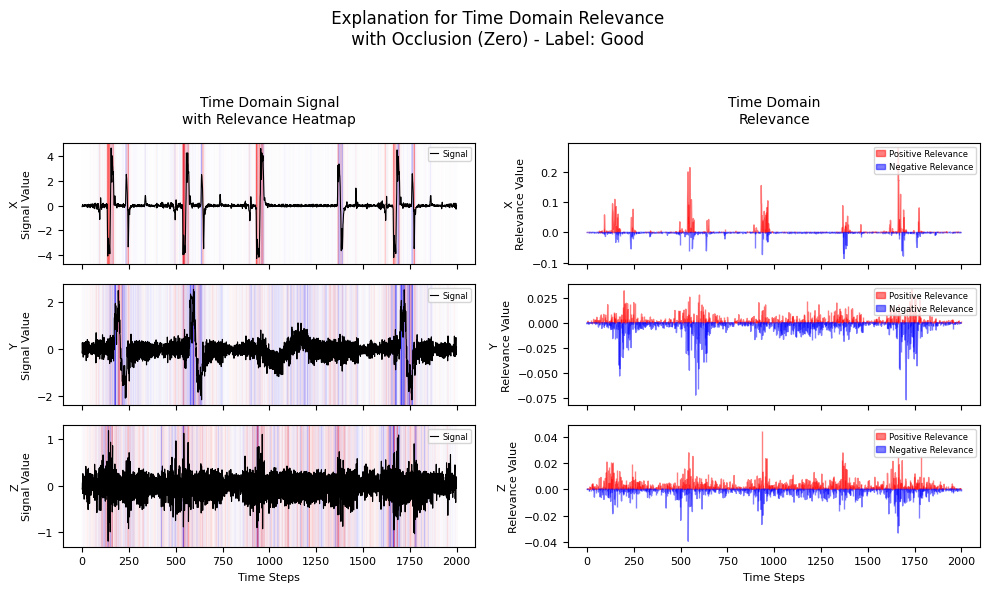

In [117]:
# Occlusion (zero-based occlusion)
occlusion_attr_zero, _ = occlusion_signal_relevance(best_model, sample, occlusion_type="zero")
print(f"Min relevance: {np.min(occlusion_attr_zero.detach().cpu().numpy())}, Max relevance: {np.max(occlusion_attr_zero.detach().cpu().numpy())}")
visualize_with_label_attribution(sample, occlusion_attr_zero, label, "Occlusion (Zero)")


Min relevance: -0.06383872032165527, Max relevance: 0.05526900291442871
Maximum Absolute Attribution in Axis 0: 0.03260445594787598
Maximum Absolute Attribution in Axis 1: 0.025243468582630157
Maximum Absolute Attribution in Axis 2: 0.015531175769865513


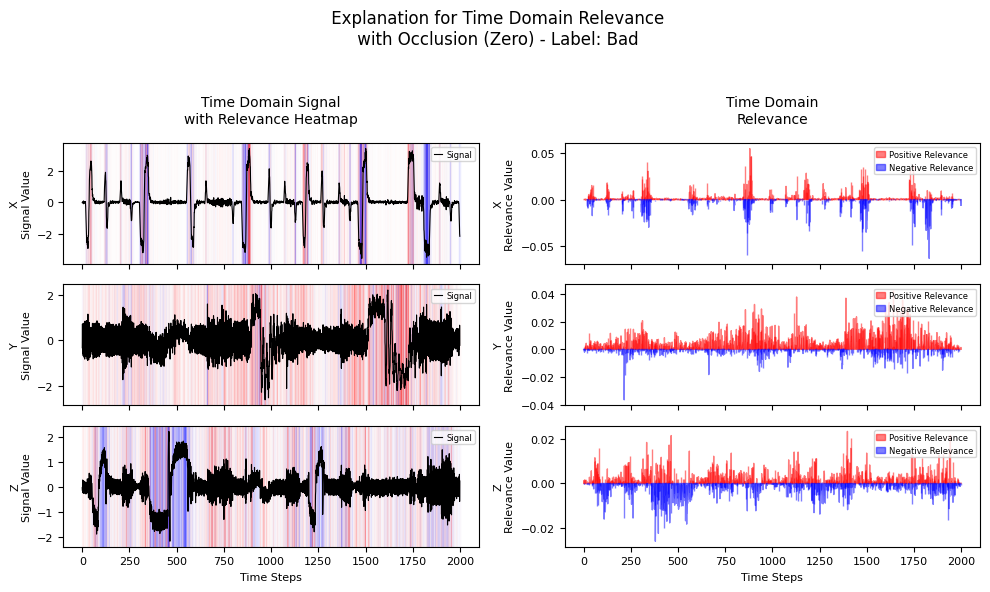

In [118]:
# Occlusion (zero-based occlusion)
occlusion_attr_zero_b, _ = occlusion_signal_relevance(best_model, sample_b, occlusion_type="zero")
print(f"Min relevance: {np.min(occlusion_attr_zero_b.detach().cpu().numpy())}, Max relevance: {np.max(occlusion_attr_zero_b.detach().cpu().numpy())}")
visualize_with_label_attribution(sample_b, occlusion_attr_zero_b, label_b, "Occlusion (Zero)")

Min relevance: -0.5514945983886719, Max relevance: 1.0646109580993652
Maximum Absolute Attribution in Axis 0: 1.0646109580993652
Maximum Absolute Attribution in Axis 1: 1.0646109580993652
Maximum Absolute Attribution in Axis 2: 1.0646109580993652


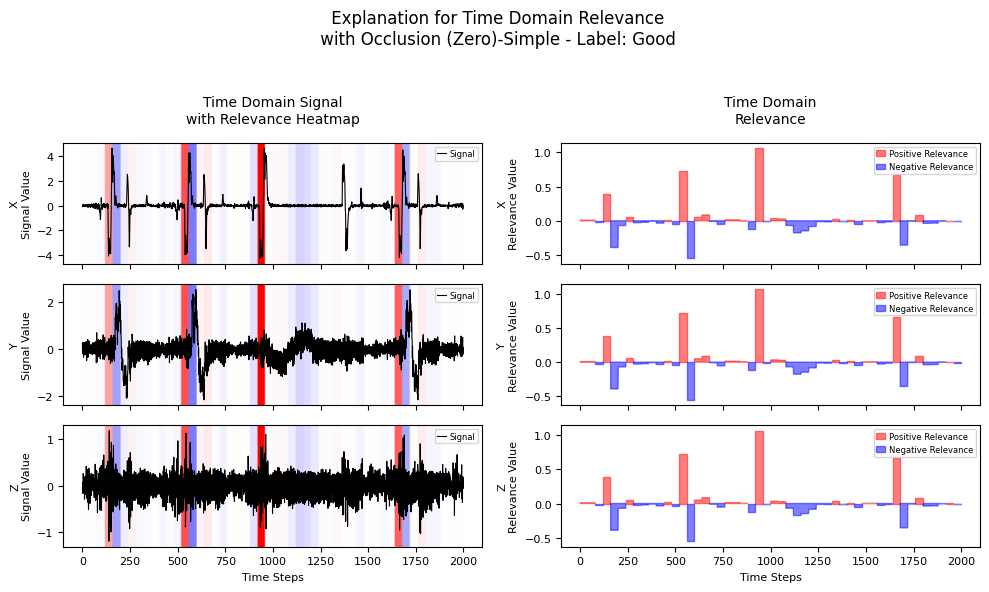

In [119]:
# Occlusion (zero-based occlusion)
occlusion_attr_zero_simple, _ = occlusion_simpler_relevance(best_model, sample, occlusion_type="zero")
print(f"Min relevance: {np.min(occlusion_attr_zero_simple.detach().cpu().numpy())}, Max relevance: {np.max(occlusion_attr_zero_simple.detach().cpu().numpy())}")
visualize_with_label_attribution(sample, occlusion_attr_zero_simple, label, "Occlusion (Zero)-Simple")


Min relevance: -0.3347632884979248, Max relevance: 0.3591928482055664
Maximum Absolute Attribution in Axis 0: 0.3591928482055664
Maximum Absolute Attribution in Axis 1: 0.3591928482055664
Maximum Absolute Attribution in Axis 2: 0.3591928482055664


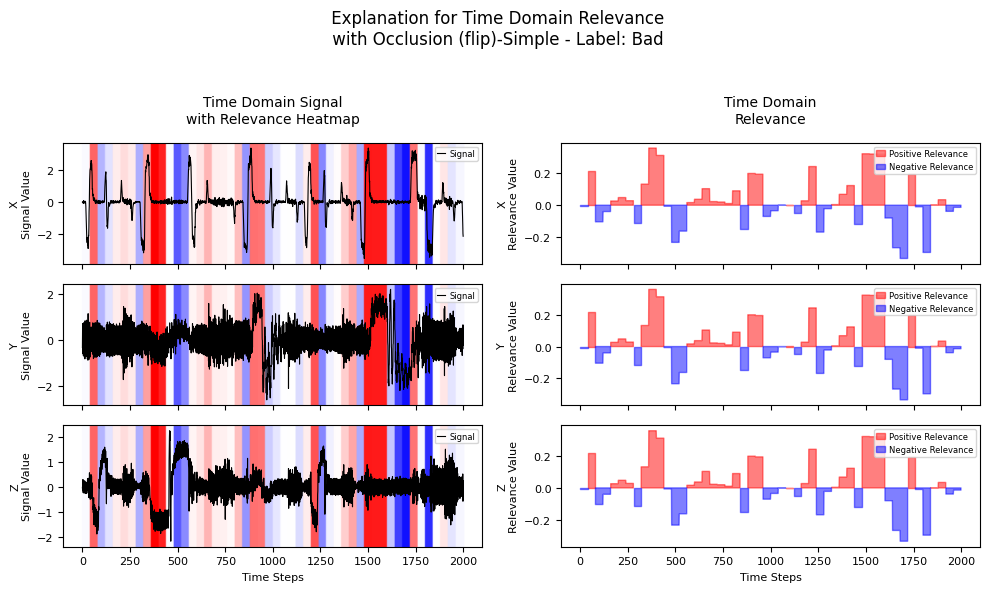

In [121]:
# Occlusion (zero-based occlusion)
occlusion_attr_zero_simple_b, _ = occlusion_simpler_relevance(best_model, sample_b, occlusion_type="flip")
print(f"Min relevance: {np.min(occlusion_attr_zero_simple_b.detach().cpu().numpy())}, Max relevance: {np.max(occlusion_attr_zero_simple_b.detach().cpu().numpy())}")
visualize_with_label_attribution(sample_b, occlusion_attr_zero_simple_b, label_b, "Occlusion (flip)-Simple")


Min relevance: -0.09418869018554688, Max relevance: 0.35747623443603516
Maximum Absolute Attribution in Axis 0: 0.10355206578969955
Maximum Absolute Attribution in Axis 1: 0.05759000405669212
Maximum Absolute Attribution in Axis 2: 0.043717581778764725


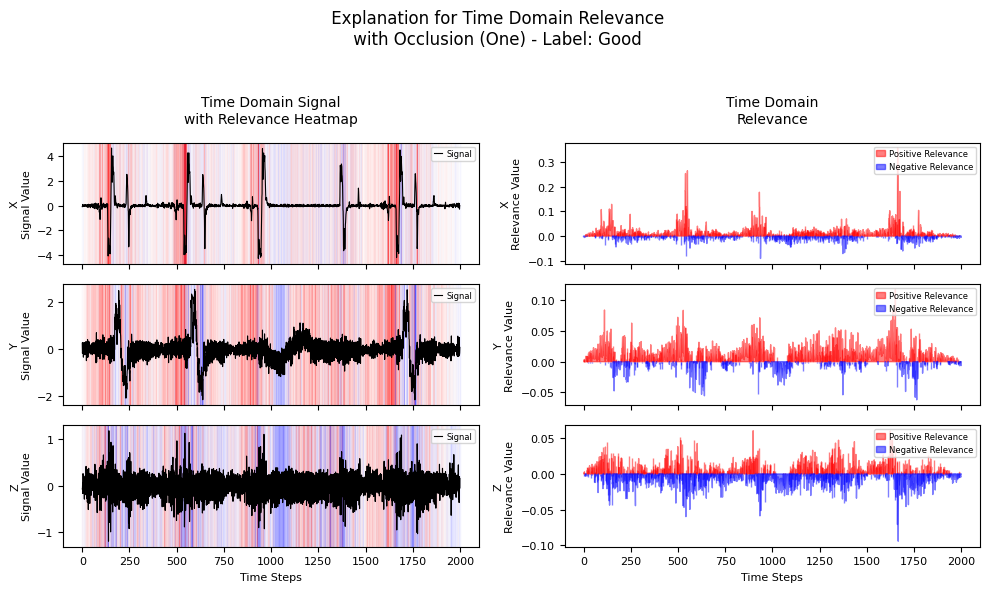

In [122]:
# Occlusion (one occlusion)
occlusion_attr_one, _ = occlusion_signal_relevance(best_model, sample, occlusion_type="one")
print(f"Min relevance: {np.min(occlusion_attr_one.detach().cpu().numpy())}, Max relevance: {np.max(occlusion_attr_one.detach().cpu().numpy())}")
visualize_with_label_attribution(sample, occlusion_attr_one, label, "Occlusion (One)")


Min relevance: -0.07601428031921387, Max relevance: 0.05326080322265625
Maximum Absolute Attribution in Axis 0: 0.039496660232543945
Maximum Absolute Attribution in Axis 1: 0.03445819392800331
Maximum Absolute Attribution in Axis 2: 0.031378306448459625


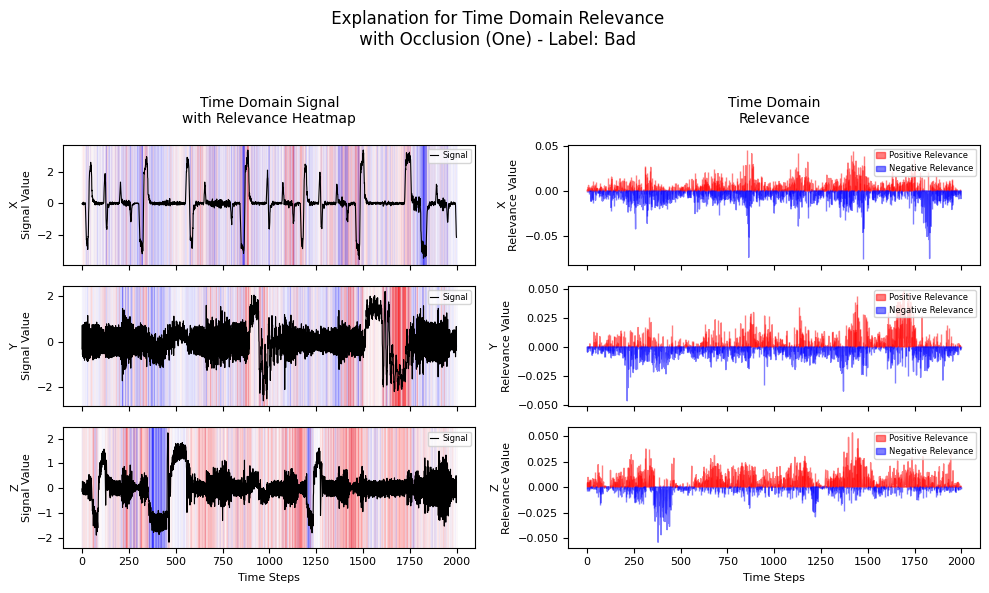

In [123]:
# Occlusion (one occlusion)
occlusion_attr_one_b, _ = occlusion_signal_relevance(best_model, sample_b, occlusion_type="one")
print(f"Min relevance: {np.min(occlusion_attr_one_b.detach().cpu().numpy())}, Max relevance: {np.max(occlusion_attr_one_b.detach().cpu().numpy())}")
visualize_with_label_attribution(sample_b, occlusion_attr_one_b, label_b, "Occlusion (One)")

Min relevance: -0.38304710388183594, Max relevance: 0.8658485412597656
Maximum Absolute Attribution in Axis 0: 0.6173766255378723
Maximum Absolute Attribution in Axis 1: 0.6173766255378723
Maximum Absolute Attribution in Axis 2: 0.6173766255378723


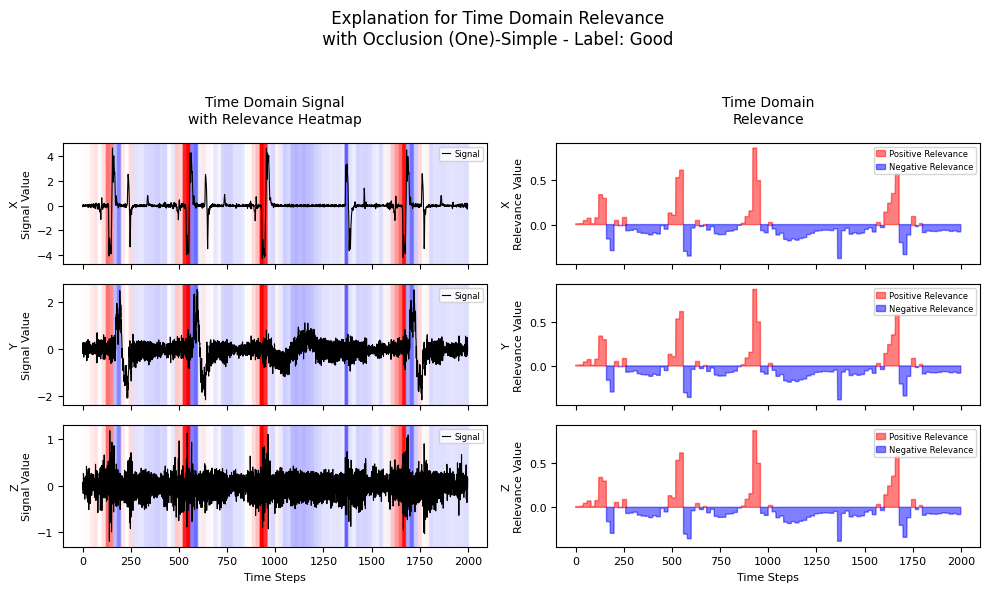

In [134]:
# Occlusion (One-based occlusion) simple version
occlusion_attr_one_simple, _ = occlusion_simpler_relevance(best_model, sample, occlusion_type="one")
print(f"Min relevance: {np.min(occlusion_attr_one_simple.detach().cpu().numpy())}, Max relevance: {np.max(occlusion_attr_one_simple.detach().cpu().numpy())}")
visualize_with_label_attribution(sample, occlusion_attr_one_simple, label, "Occlusion (One)-Simple")


Min relevance: -0.1087799072265625, Max relevance: 0.16927194595336914
Maximum Absolute Attribution in Axis 0: 0.15387651324272156
Maximum Absolute Attribution in Axis 1: 0.15387651324272156
Maximum Absolute Attribution in Axis 2: 0.15387651324272156


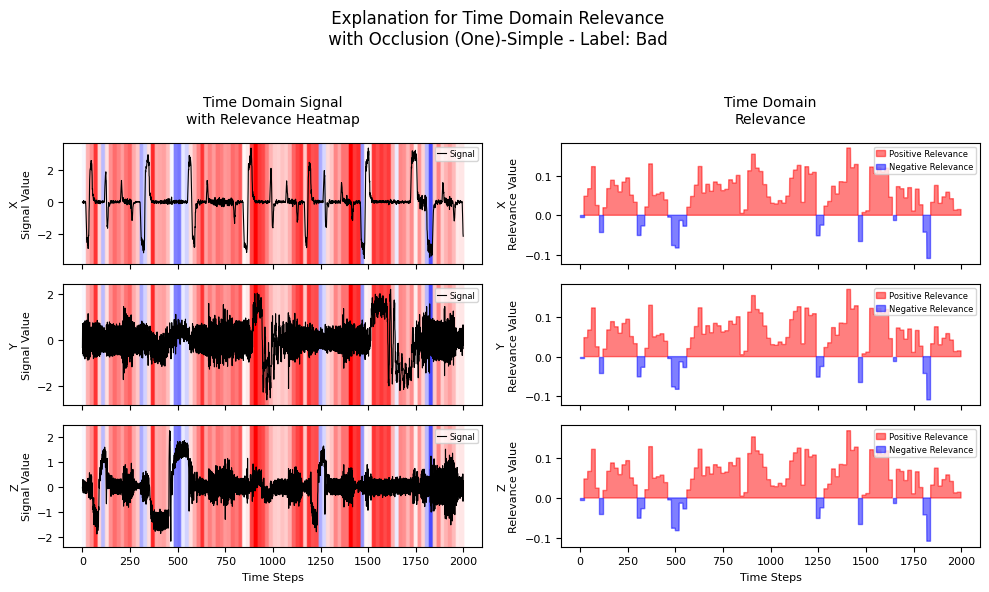

In [133]:
# Occlusion (One-based occlusion) simple version
occlusion_attr_one_simple_b, _ = occlusion_simpler_relevance(best_model, sample_b, occlusion_type="one")
print(f"Min relevance: {np.min(occlusion_attr_one_simple_b.detach().cpu().numpy())}, Max relevance: {np.max(occlusion_attr_one_simple_b.detach().cpu().numpy())}")
visualize_with_label_attribution(sample_b, occlusion_attr_one_simple_b, label_b, "Occlusion (One)-Simple")


Min relevance: -0.10736989974975586, Max relevance: 0.20485353469848633
Maximum Absolute Attribution in Axis 0: 0.08491799235343933
Maximum Absolute Attribution in Axis 1: 0.05714460089802742
Maximum Absolute Attribution in Axis 2: 0.06854686141014099


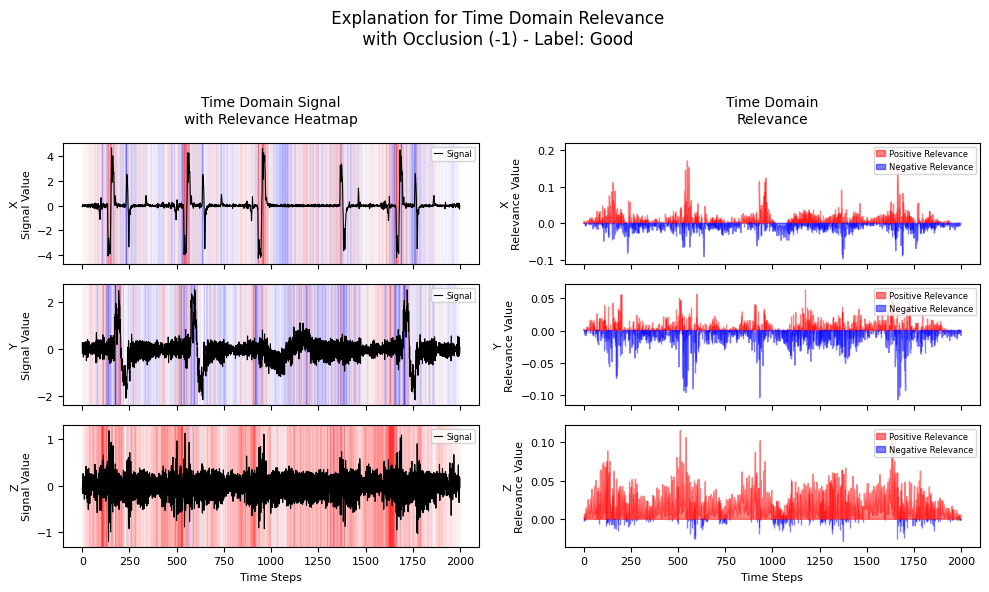

In [124]:
# Occlusion (-one occlusion)
occlusion_attr_mone, _ = occlusion_signal_relevance(best_model, sample, occlusion_type="mone")
print(f"Min relevance: {np.min(occlusion_attr_mone.detach().cpu().numpy())}, Max relevance: {np.max(occlusion_attr_mone.detach().cpu().numpy())}")
visualize_with_label_attribution(sample, occlusion_attr_mone, label, "Occlusion (-1)")


Min relevance: -0.0584406852722168, Max relevance: 0.07531166076660156
Maximum Absolute Attribution in Axis 0: 0.03660548850893974
Maximum Absolute Attribution in Axis 1: 0.04594326391816139
Maximum Absolute Attribution in Axis 2: 0.026637716218829155


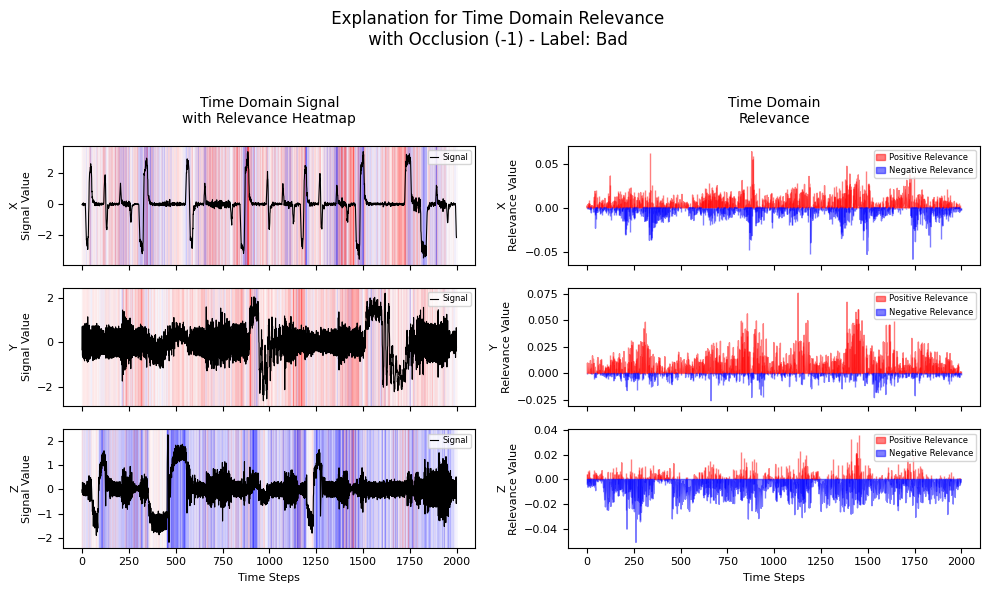

In [125]:
# Occlusion (-one occlusion)
occlusion_attr_mone_b, _ = occlusion_signal_relevance(best_model, sample_b, occlusion_type="mone")
print(f"Min relevance: {np.min(occlusion_attr_mone_b.detach().cpu().numpy())}, Max relevance: {np.max(occlusion_attr_mone_b.detach().cpu().numpy())}")
visualize_with_label_attribution(sample_b, occlusion_attr_mone_b, label_b, "Occlusion (-1)")

Min relevance: -0.13373756408691406, Max relevance: 0.5126800537109375
Maximum Absolute Attribution in Axis 0: 0.17248667776584625
Maximum Absolute Attribution in Axis 1: 0.058256637305021286
Maximum Absolute Attribution in Axis 2: 0.039845388382673264


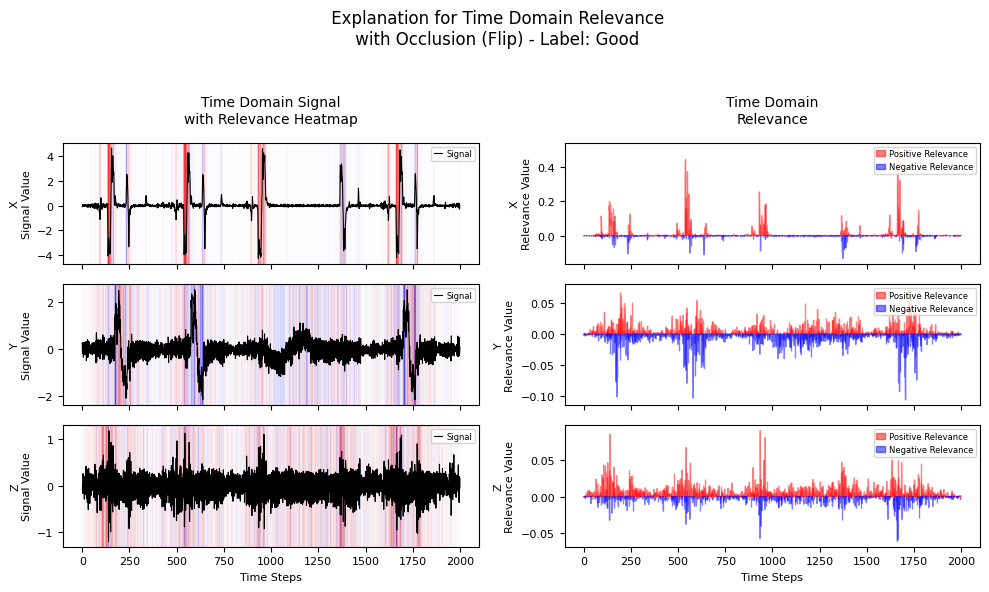

In [126]:
# Occlusion (flip occlusion)
occlusion_attr_flip, _ = occlusion_signal_relevance(best_model, sample, occlusion_type="flip")
print(f"Min relevance: {np.min(occlusion_attr_flip.detach().cpu().numpy())}, Max relevance: {np.max(occlusion_attr_flip.detach().cpu().numpy())}")

visualize_with_label_attribution(sample, occlusion_attr_flip, label, "Occlusion (Flip)")


Min relevance: -0.10276222229003906, Max relevance: 0.07293367385864258
Maximum Absolute Attribution in Axis 0: 0.06375358998775482
Maximum Absolute Attribution in Axis 1: 0.04543968290090561
Maximum Absolute Attribution in Axis 2: 0.034920256584882736


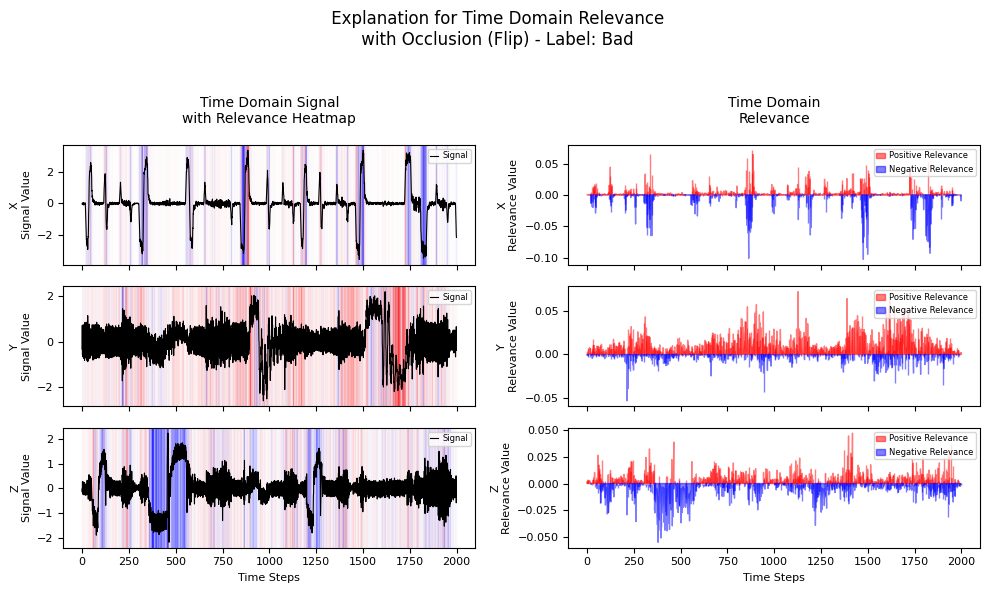

In [127]:
# Occlusion (e.g., zero-based occlusion)
occlusion_attr_flip_b, _ = occlusion_signal_relevance(best_model, sample_b, occlusion_type="flip")
print(f"Min relevance: {np.min(occlusion_attr_flip_b.detach().cpu().numpy())}, Max relevance: {np.max(occlusion_attr_flip_b.detach().cpu().numpy())}")

visualize_with_label_attribution(sample_b, occlusion_attr_flip_b, label_b, "Occlusion (Flip)")


Min relevance: -1.013399600982666, Max relevance: 0.9342679977416992
Maximum Absolute Attribution in Axis 0: 0.9350600838661194
Maximum Absolute Attribution in Axis 1: 0.9350600838661194
Maximum Absolute Attribution in Axis 2: 0.9350600838661194


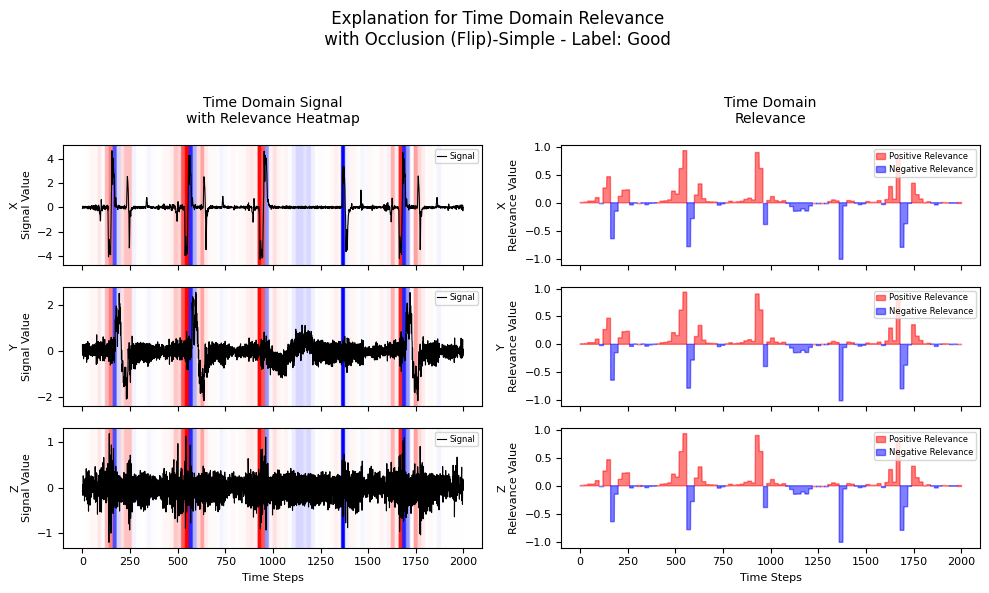

In [135]:
# Occlusion (flip-based occlusion), simpler version
occlusion_attr_flip_simple, _ = occlusion_simpler_relevance(best_model, sample, occlusion_type="flip")
print(f"Min relevance: {np.min(occlusion_attr_flip_simple.detach().cpu().numpy())}, Max relevance: {np.max(occlusion_attr_flip_simple.detach().cpu().numpy())}")
visualize_with_label_attribution(sample, occlusion_attr_flip_simple, label, "Occlusion (Flip)-Simple")


Min relevance: -0.1885087490081787, Max relevance: 0.20966625213623047
Maximum Absolute Attribution in Axis 0: 0.19767771661281586
Maximum Absolute Attribution in Axis 1: 0.19767771661281586
Maximum Absolute Attribution in Axis 2: 0.19767771661281586


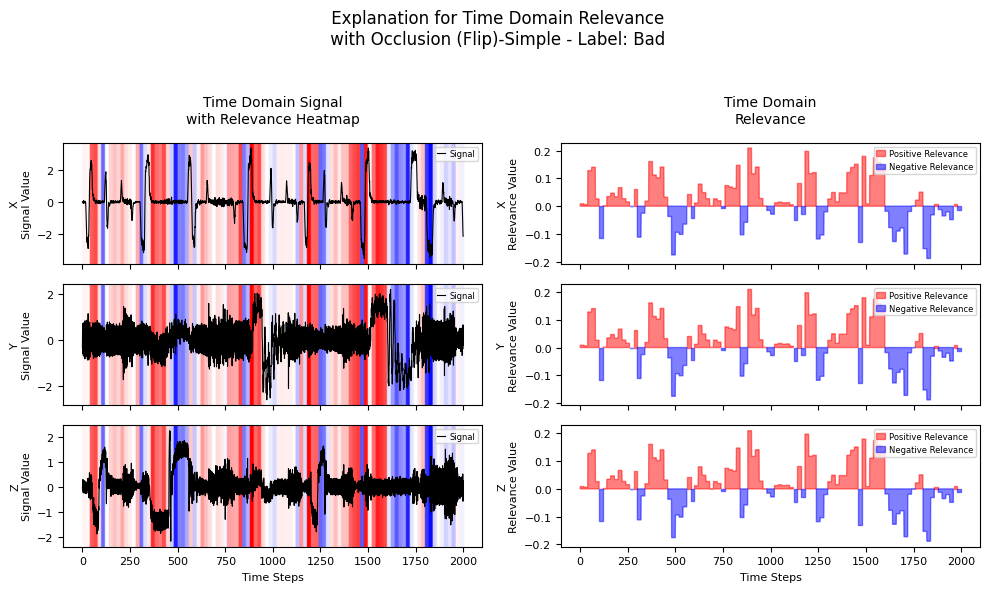

In [136]:
# Occlusion (flip-based occlusion), simpler version
occlusion_attr_flip_simple_b, _ = occlusion_simpler_relevance(best_model, sample_b, occlusion_type="flip")
print(f"Min relevance: {np.min(occlusion_attr_flip_simple_b.detach().cpu().numpy())}, Max relevance: {np.max(occlusion_attr_flip_simple_b.detach().cpu().numpy())}")
visualize_with_label_attribution(sample_b, occlusion_attr_flip_simple_b, label_b, "Occlusion (Flip)-Simple")


In [128]:
summary_b_of = summarize_attributions(occlusion_attr_flip_b.detach().cpu().numpy())  # Pass your attributions here

# Flatten the summary dictionary and create a DataFrame
data = []
for axis, values in summary_b_of.items():
    row = {"Axis": axis}
    row.update(values)
    data.append(row)

# Create the DataFrame
df_summary = pd.DataFrame(data)

# Display the DataFrame as a table
print(df_summary)

     Axis  Positive Count  Total Positive Relevance  \
0  Axis 0            1156                  4.179246   
1  Axis 1            1347                 12.216551   
2  Axis 2             974                  4.290623   

   Average Positive Relevance  Negative Count  Total Negative Relevance  \
0                    0.003615             841                 -6.968124   
1                    0.009069             653                 -3.064667   
2                    0.004405            1026                 -7.181568   

   Average Negative Relevance  Total Relevance (Pos + Neg)  \
0                   -0.008286                    -2.788878   
1                   -0.004693                     9.151884   
2                   -0.007000                    -2.890945   

   Average Relevance (Pos + Neg)  
0                      -0.001397  
1                       0.004576  
2                      -0.001445  


In [138]:
torch.cuda.empty_cache()
gc.collect()

0